In [298]:
import os, pickle, re, glob, time
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
from collections import Counter

plt.style.use('ggplot')
sns.set_style('ticks')
pd.set_option('precision', 2)
pd.options.display.max_colwidth = 100

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)

In [299]:
cell_info_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_tpm_cluster.csv', index_col=0)
cell_info_df = cell_info_df[~cell_info_df['sample_id'].isin(['HN137P2', 'HN182M'])]
cell_info_df.loc[:, 'site'] = [s[5:] for s in cell_info_df['sample_id']]
cell_info_df.head()

sample_id batch  cell_number  n_genes  percent_mito   n_counts  \
RHH2176    HN120P   RHH         2176     3602          0.08  998435.90   
RHH2177    HN120P   RHH         2177     5748          0.09  997598.06   
RHH2178    HN120P   RHH         2178     6648          0.12  995340.75   
RHH2179    HN120P   RHH         2179     7076          0.10  995187.60   
RHH2180    HN120P   RHH         2180     7261          0.11  993863.56   

         louvain  louvain2 cluster  UMAP1  UMAP2    PC1   PC2 patient_id site  
RHH2176       11       NaN       L   3.20  -2.43  -4.14 -2.37      HN120    P  
RHH2177        3       0.0      D1  -1.23  -4.84  -7.92 -5.34      HN120    P  
RHH2178        3       0.0      D1  -1.45  -4.95  -8.27 -7.21      HN120    P  
RHH2179        3       0.0      D1  -2.04  -5.15 -12.39 -6.74      HN120    P  
RHH2180        3       0.0      D1  -2.67  -4.64 -13.88 -8.84      HN120    P

In [300]:
pred_df = pd.read_csv('../result/HN_model/cell_TPM/pred_drug_kill_log2_median_ic50_hn_hn_drug_cw_dw10_100000_model_cell.csv', index_col=0)
pred_df.head()

1001   1003   1004   1006   1007   1010   1012   1014   1015   1016  \
RHH2176  34.83  37.97  24.61  34.78   6.42  11.82  52.79  33.17  45.44  36.33   
RHH2177  40.84  48.95  45.85  42.49  14.83  18.97  59.51  49.94  61.82  59.62   
RHH2178  43.04  60.01  54.54  55.93  25.34  27.38  57.29  64.10  70.52  65.32   
RHH2179  40.02  42.74  33.73  34.71  10.24  15.32  52.21  25.44  39.10  46.32   
RHH2180  34.07  26.11  23.86  27.66  10.29  18.24  47.68  22.67  38.14  48.43   

         ...    299    301    302    303    305    306    308    328    331  \
RHH2176  ...  95.55  68.67  75.09  76.80  76.55  60.83  65.08  70.97  74.11   
RHH2177  ...  92.60  60.31  72.88  70.92  70.57  52.98  64.55  62.74  68.25   
RHH2178  ...  83.51  50.87  57.03  60.33  64.65  50.59  59.87  55.06  54.67   
RHH2179  ...  97.99  76.11  89.23  80.35  79.17  68.51  71.10  79.96  82.17   
RHH2180  ...  89.54  49.81  66.42  61.05  60.22  48.25  52.08  32.15  60.21   

           346  
RHH2176  79.54  
RHH2177  74.59  
RHH2178  47.87  
RHH2179  86.05  
RHH2180  41.25  

[5 rows x 81 columns]

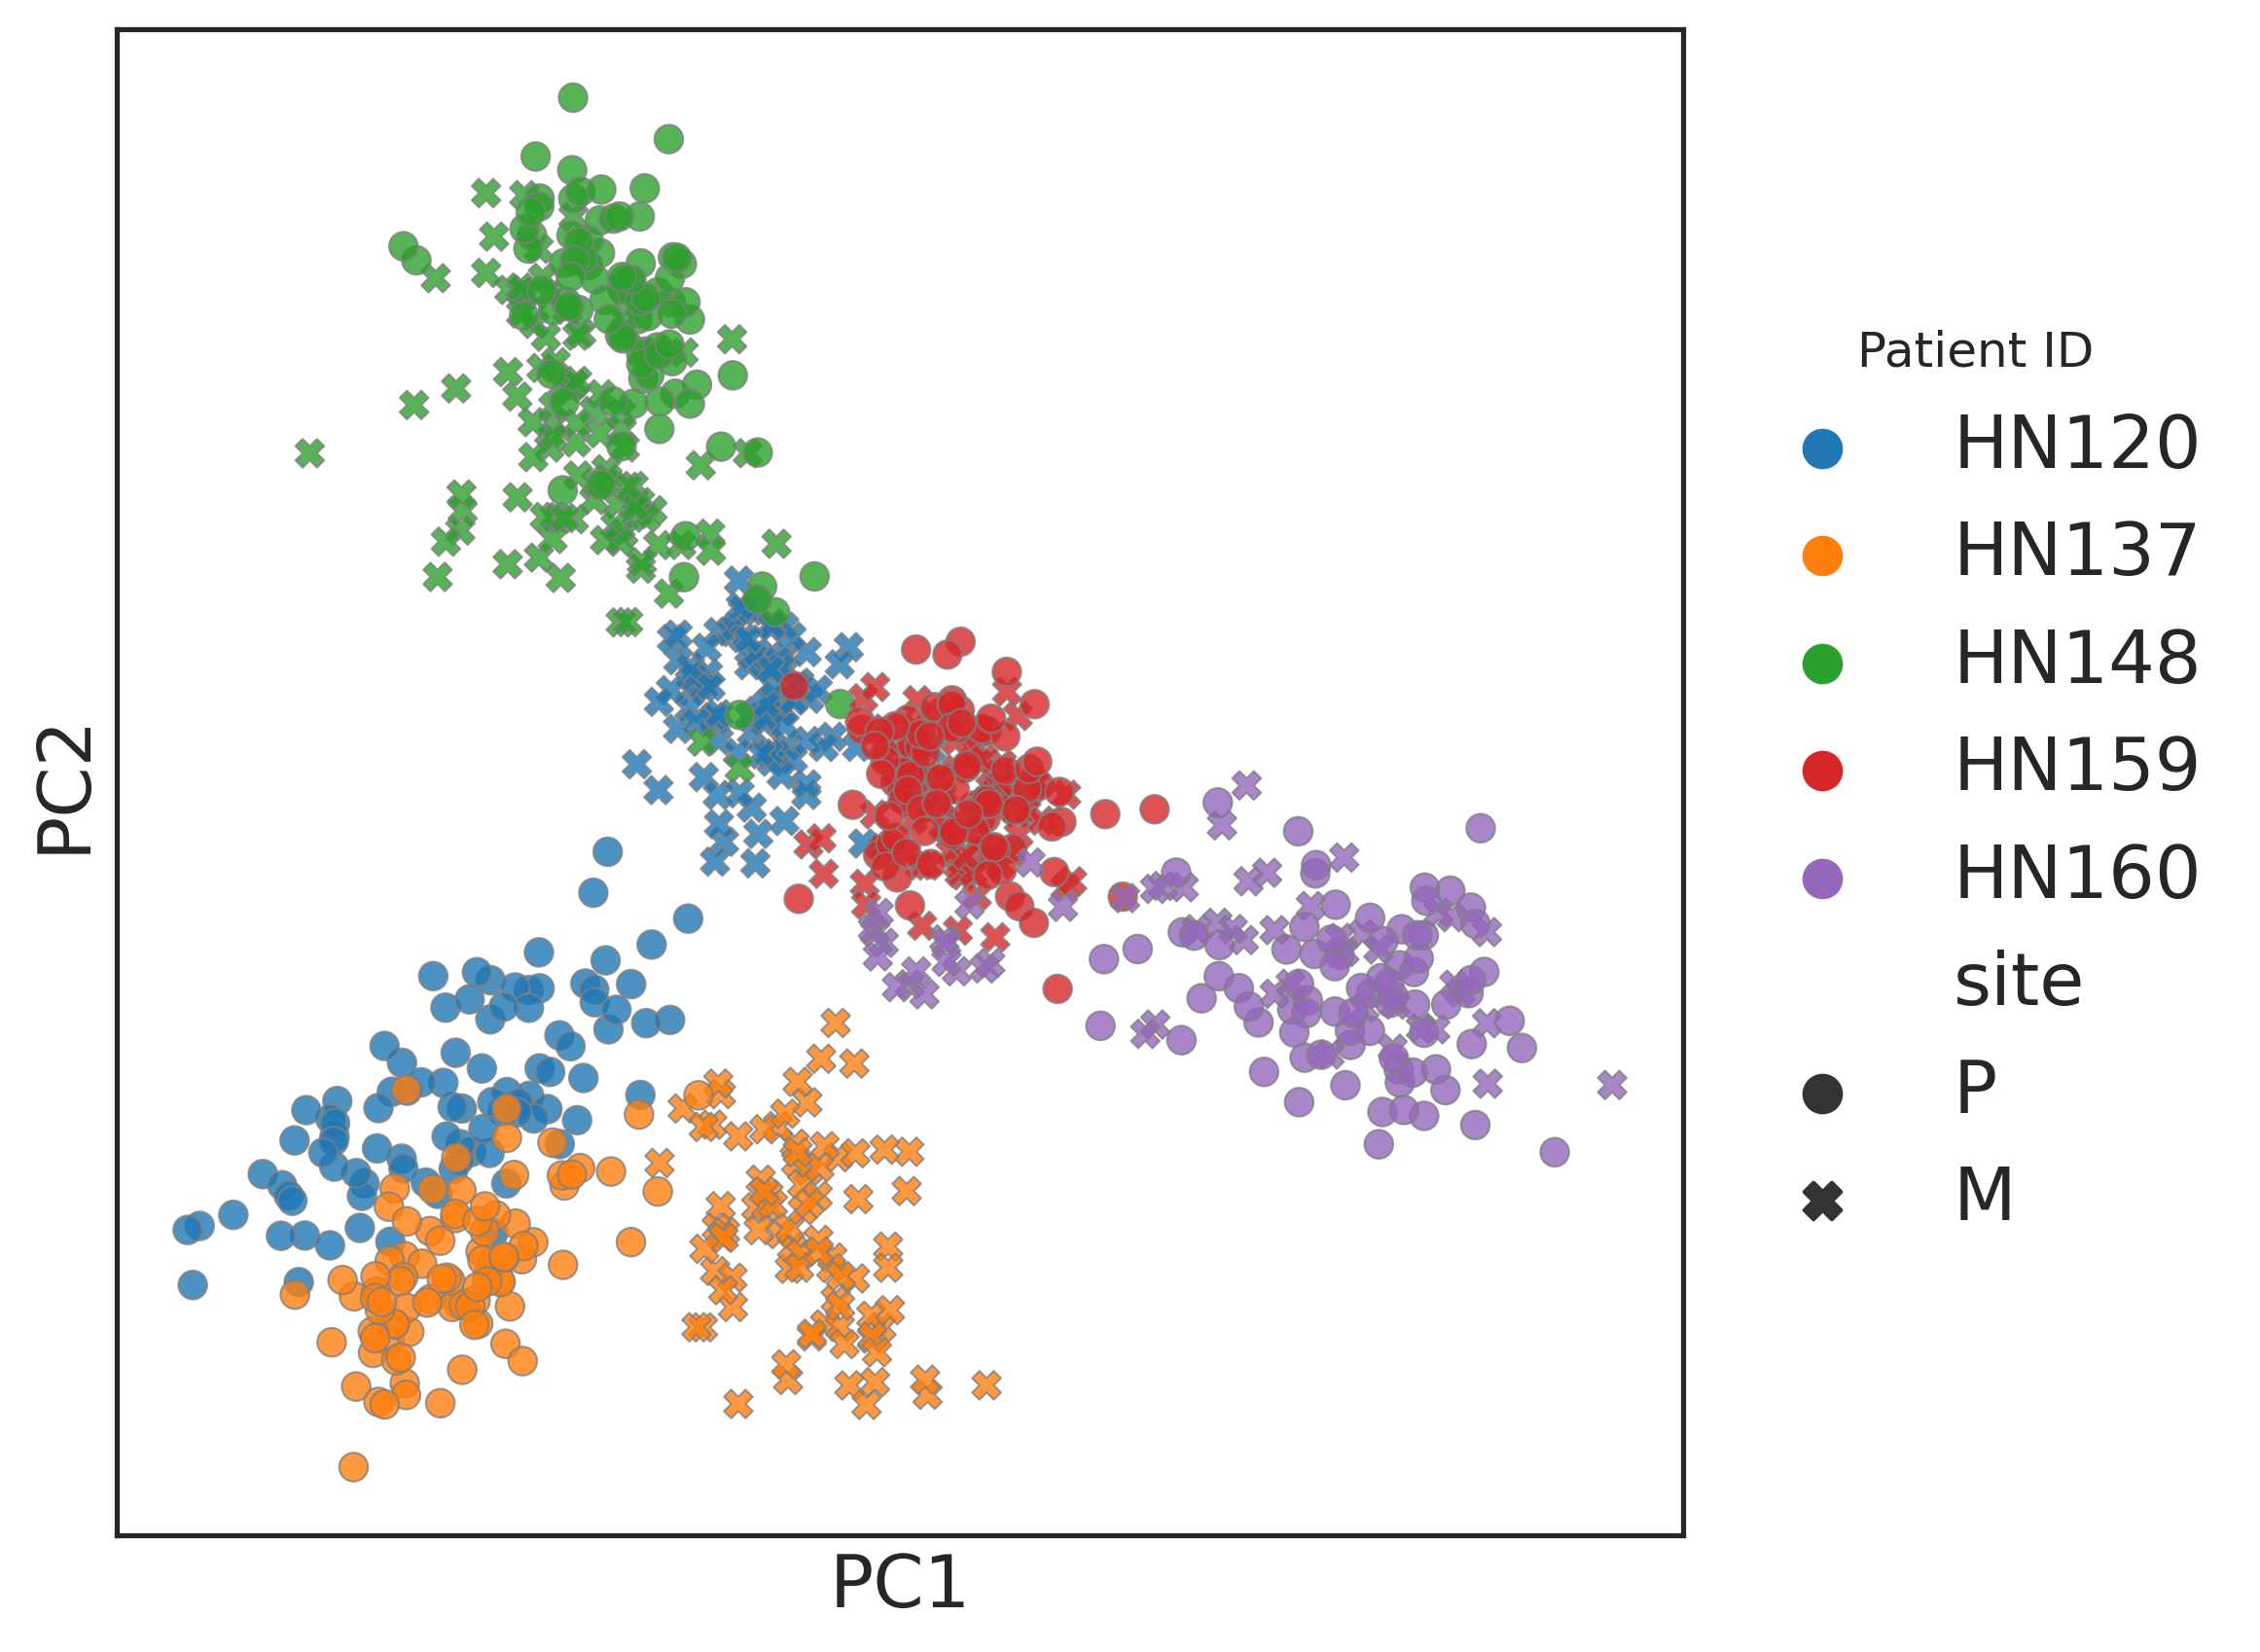

In [301]:
sns.set(font_scale=1.5, style='ticks')
fig, ax = plt.subplots(figsize=(7,6))

sns.scatterplot(data=cell_info_df.sort_values('patient_id'), x='PC1', y='PC2', hue='patient_id', style='site', s=50, alpha=.8, linewidth=0.5, palette='tab10', edgecolor='grey', ax=ax)

ax.set_xticks([], [])
ax.set_yticks([], [])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white', ncol=1, fontsize='medium', framealpha=0, markerscale=1.5, title='Patient ID')

plt.tight_layout()

plt.savefig('../figure/Fig3B_PCA_patient_pri_vs_met.svg')

In [302]:
# df = pd.merge(cell_info_df, pred_df[['133']], left_index=True, right_index=True)
# df.groupby('patient_id').size()

In [303]:
single_drug_id_list = [1007, 133, 201, 1010, 182, 301, 302, 1012]
single_drug_list = ['Docetaxel', 'Doxorubicin', 'Epothilone B', 'Gefitinib', 'Obatoclax Mesylate', 'PHA-793887', 'PI-103', 'Vorinostat']

In [305]:
cell_pred_df = pd.merge(cell_info_df, pred_df[[str(d) for d in single_drug_id_list]], left_index=True, right_index=True).sort_values('patient_id')

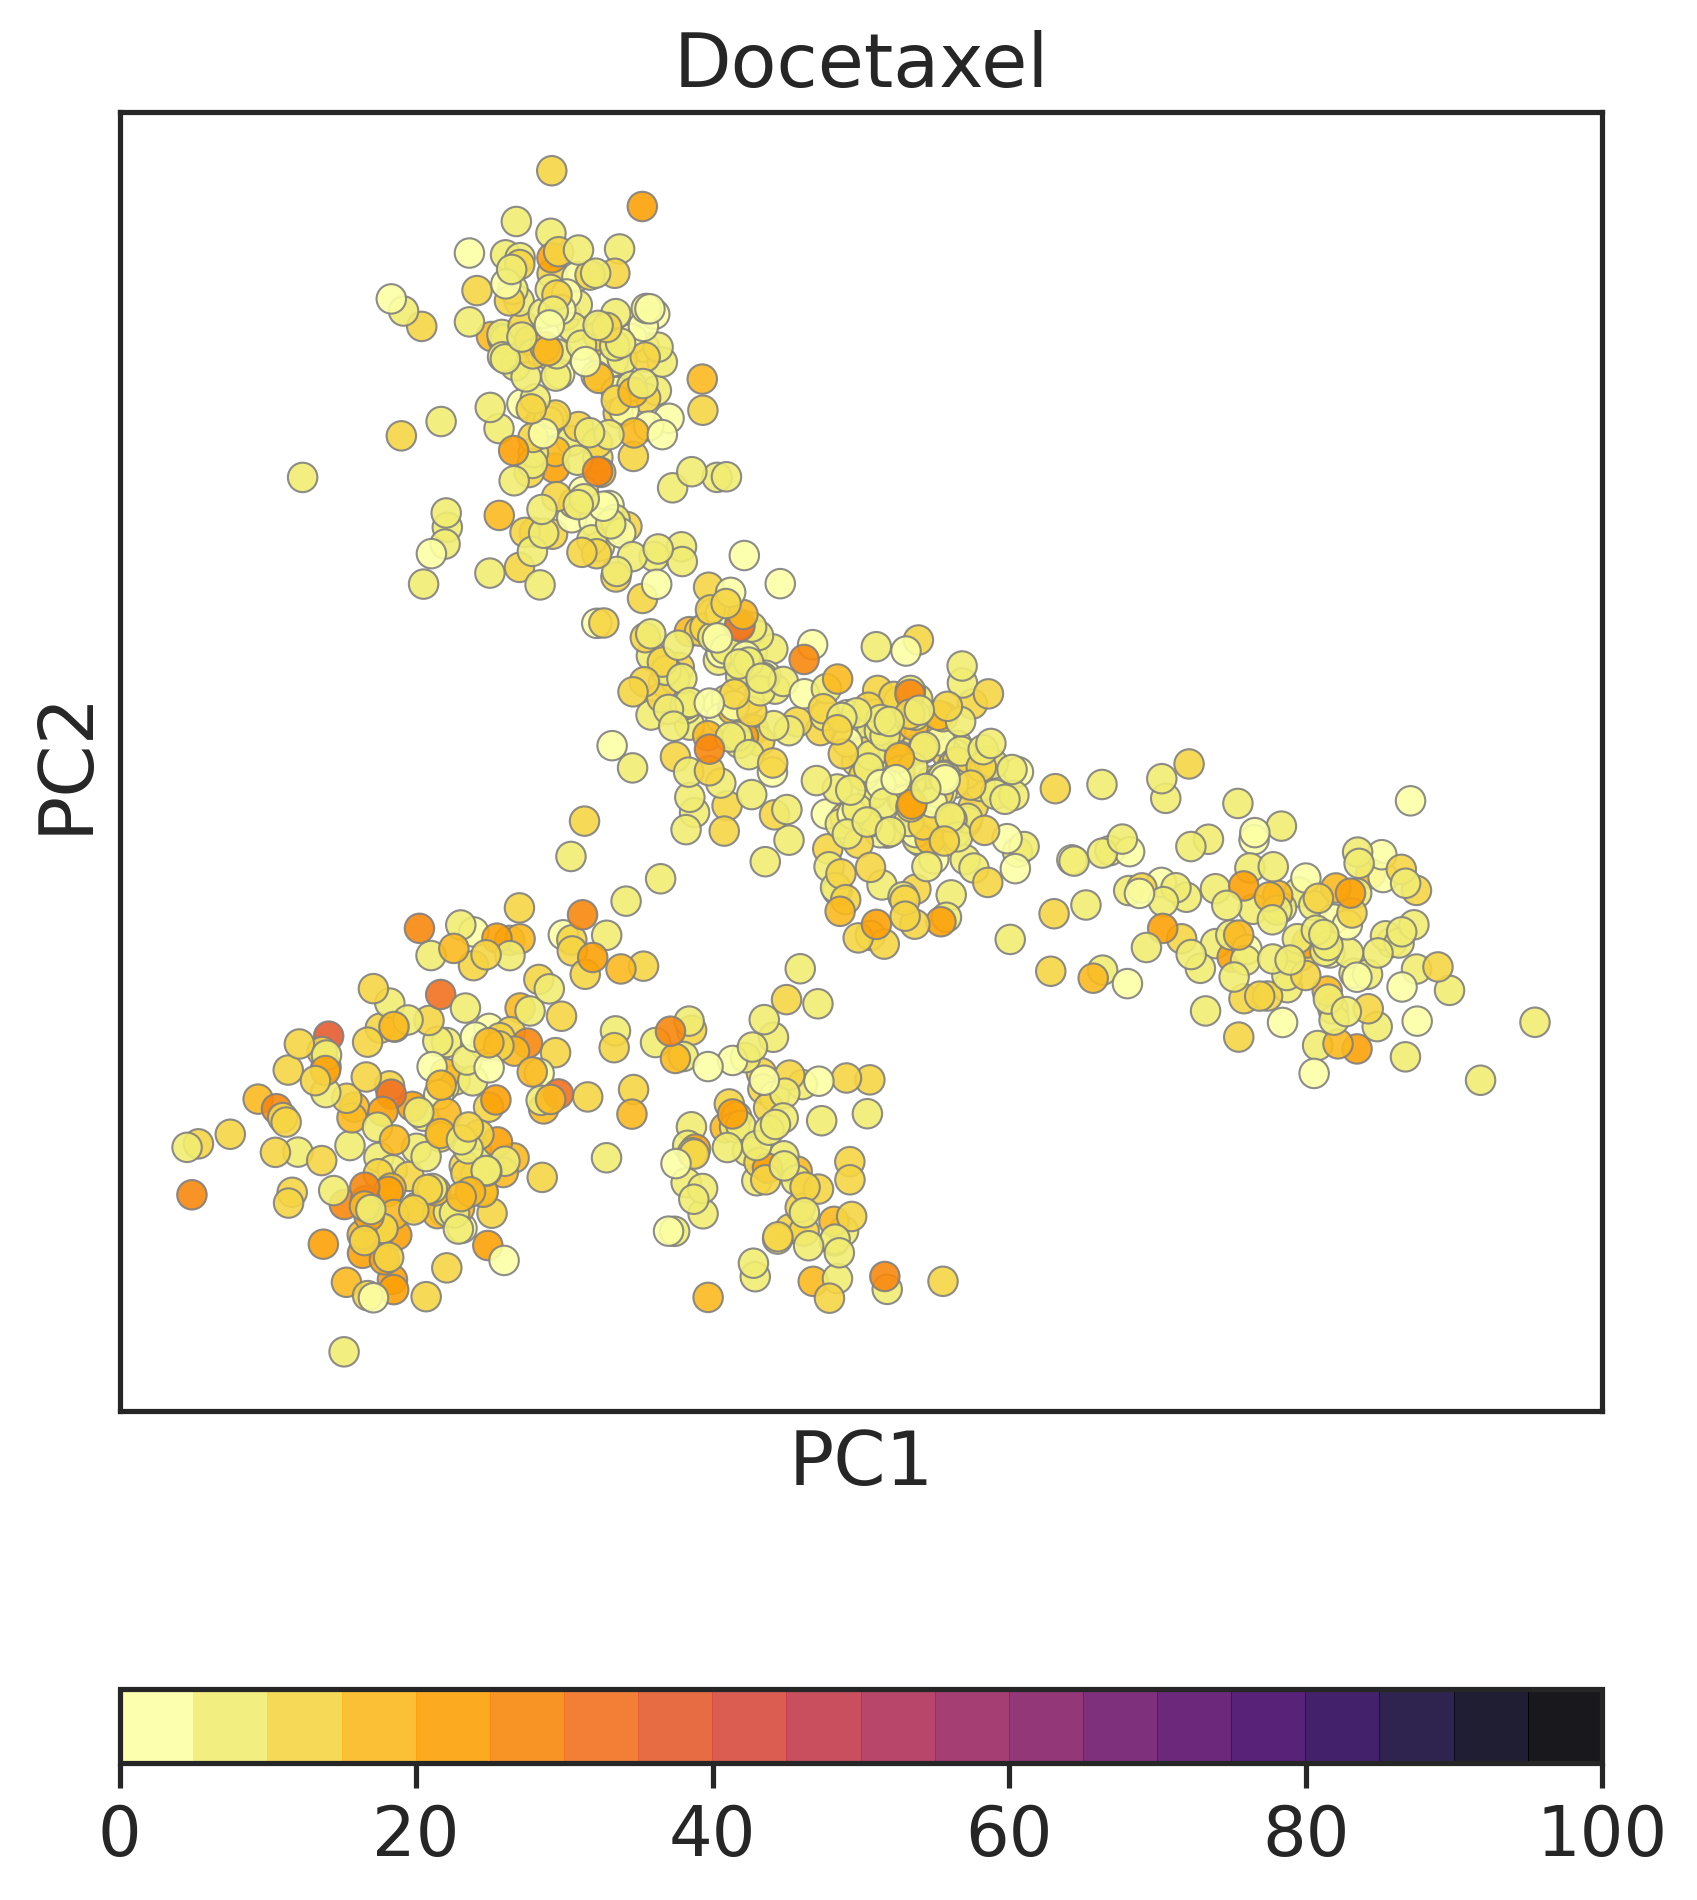

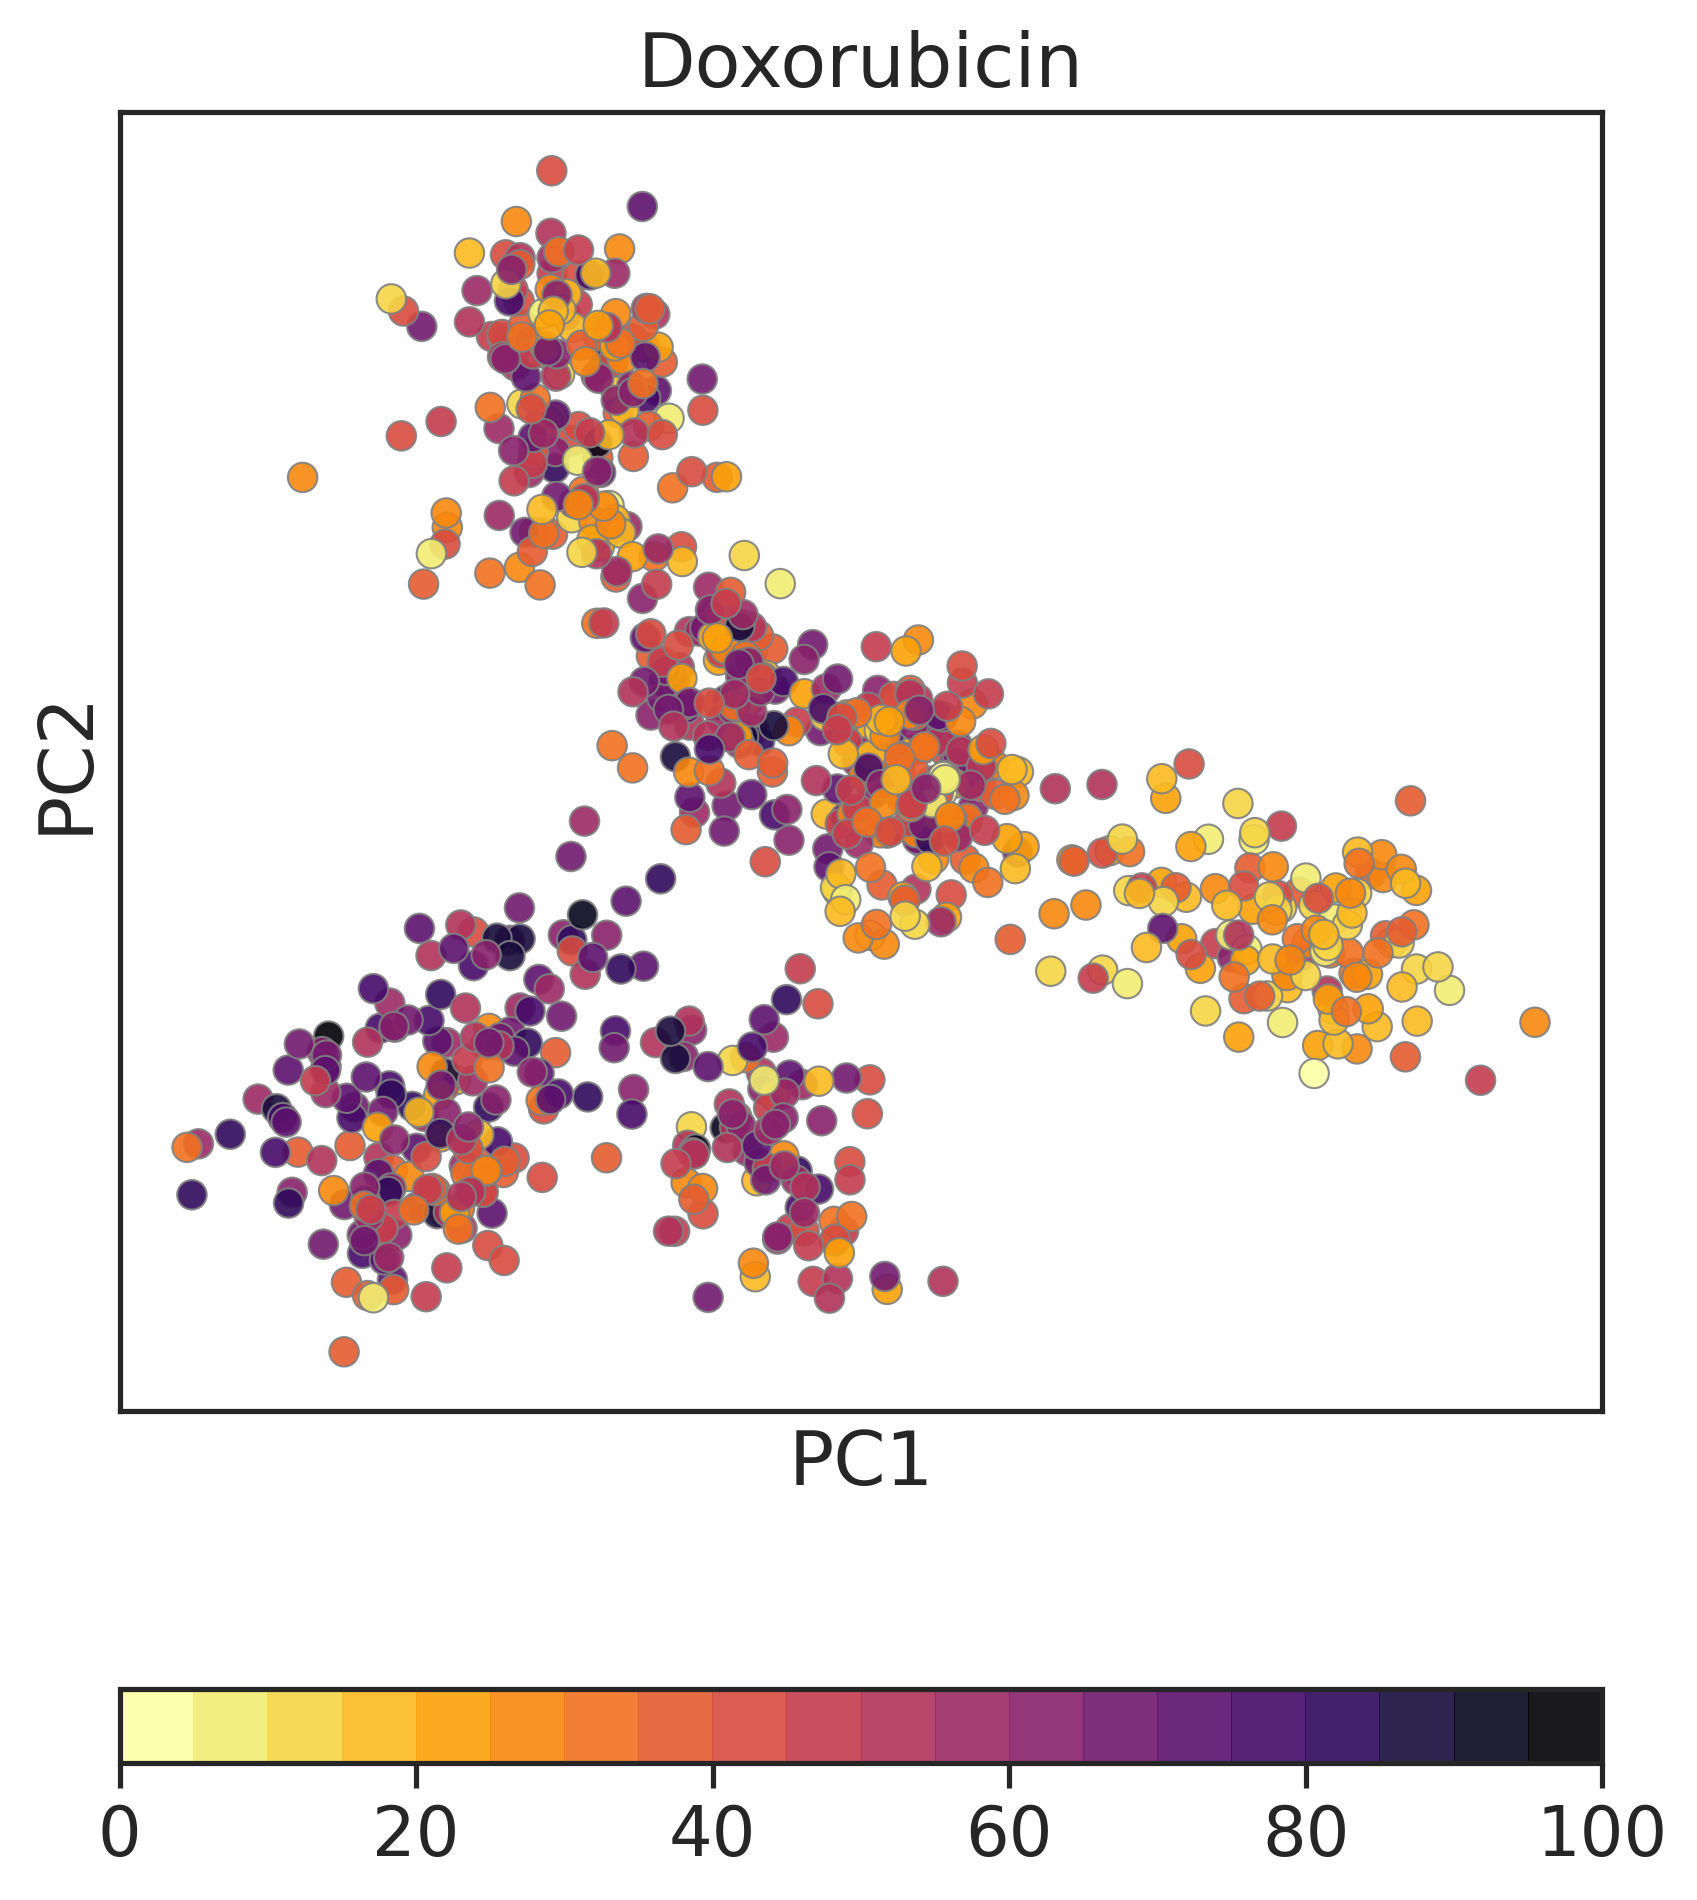

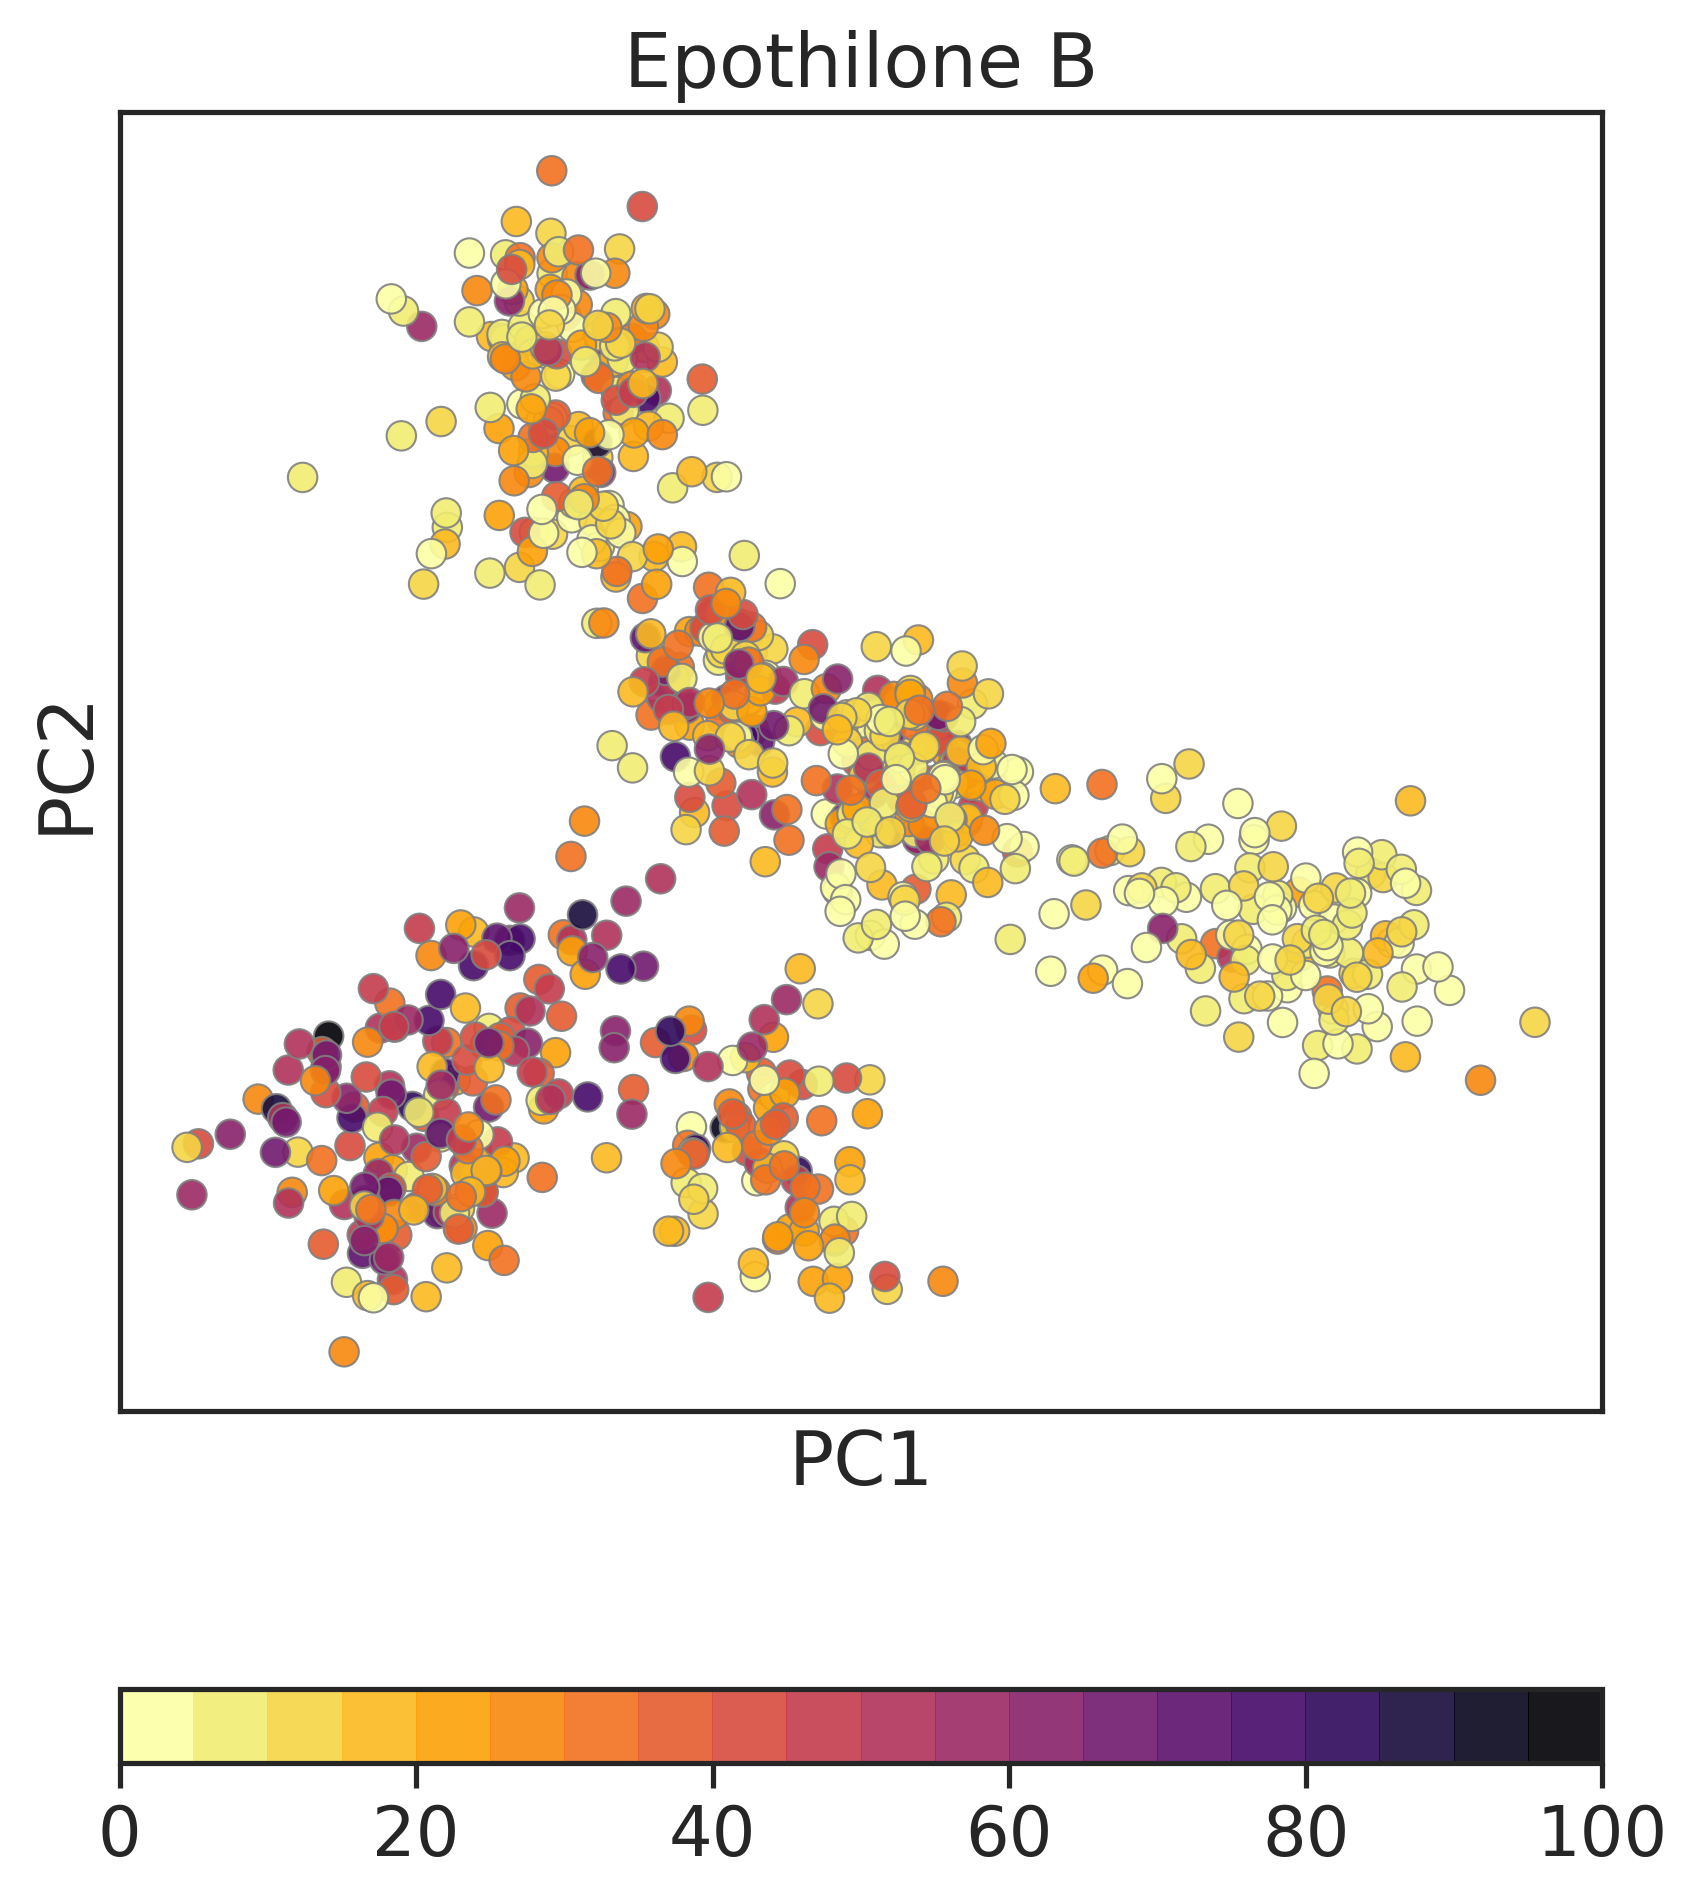

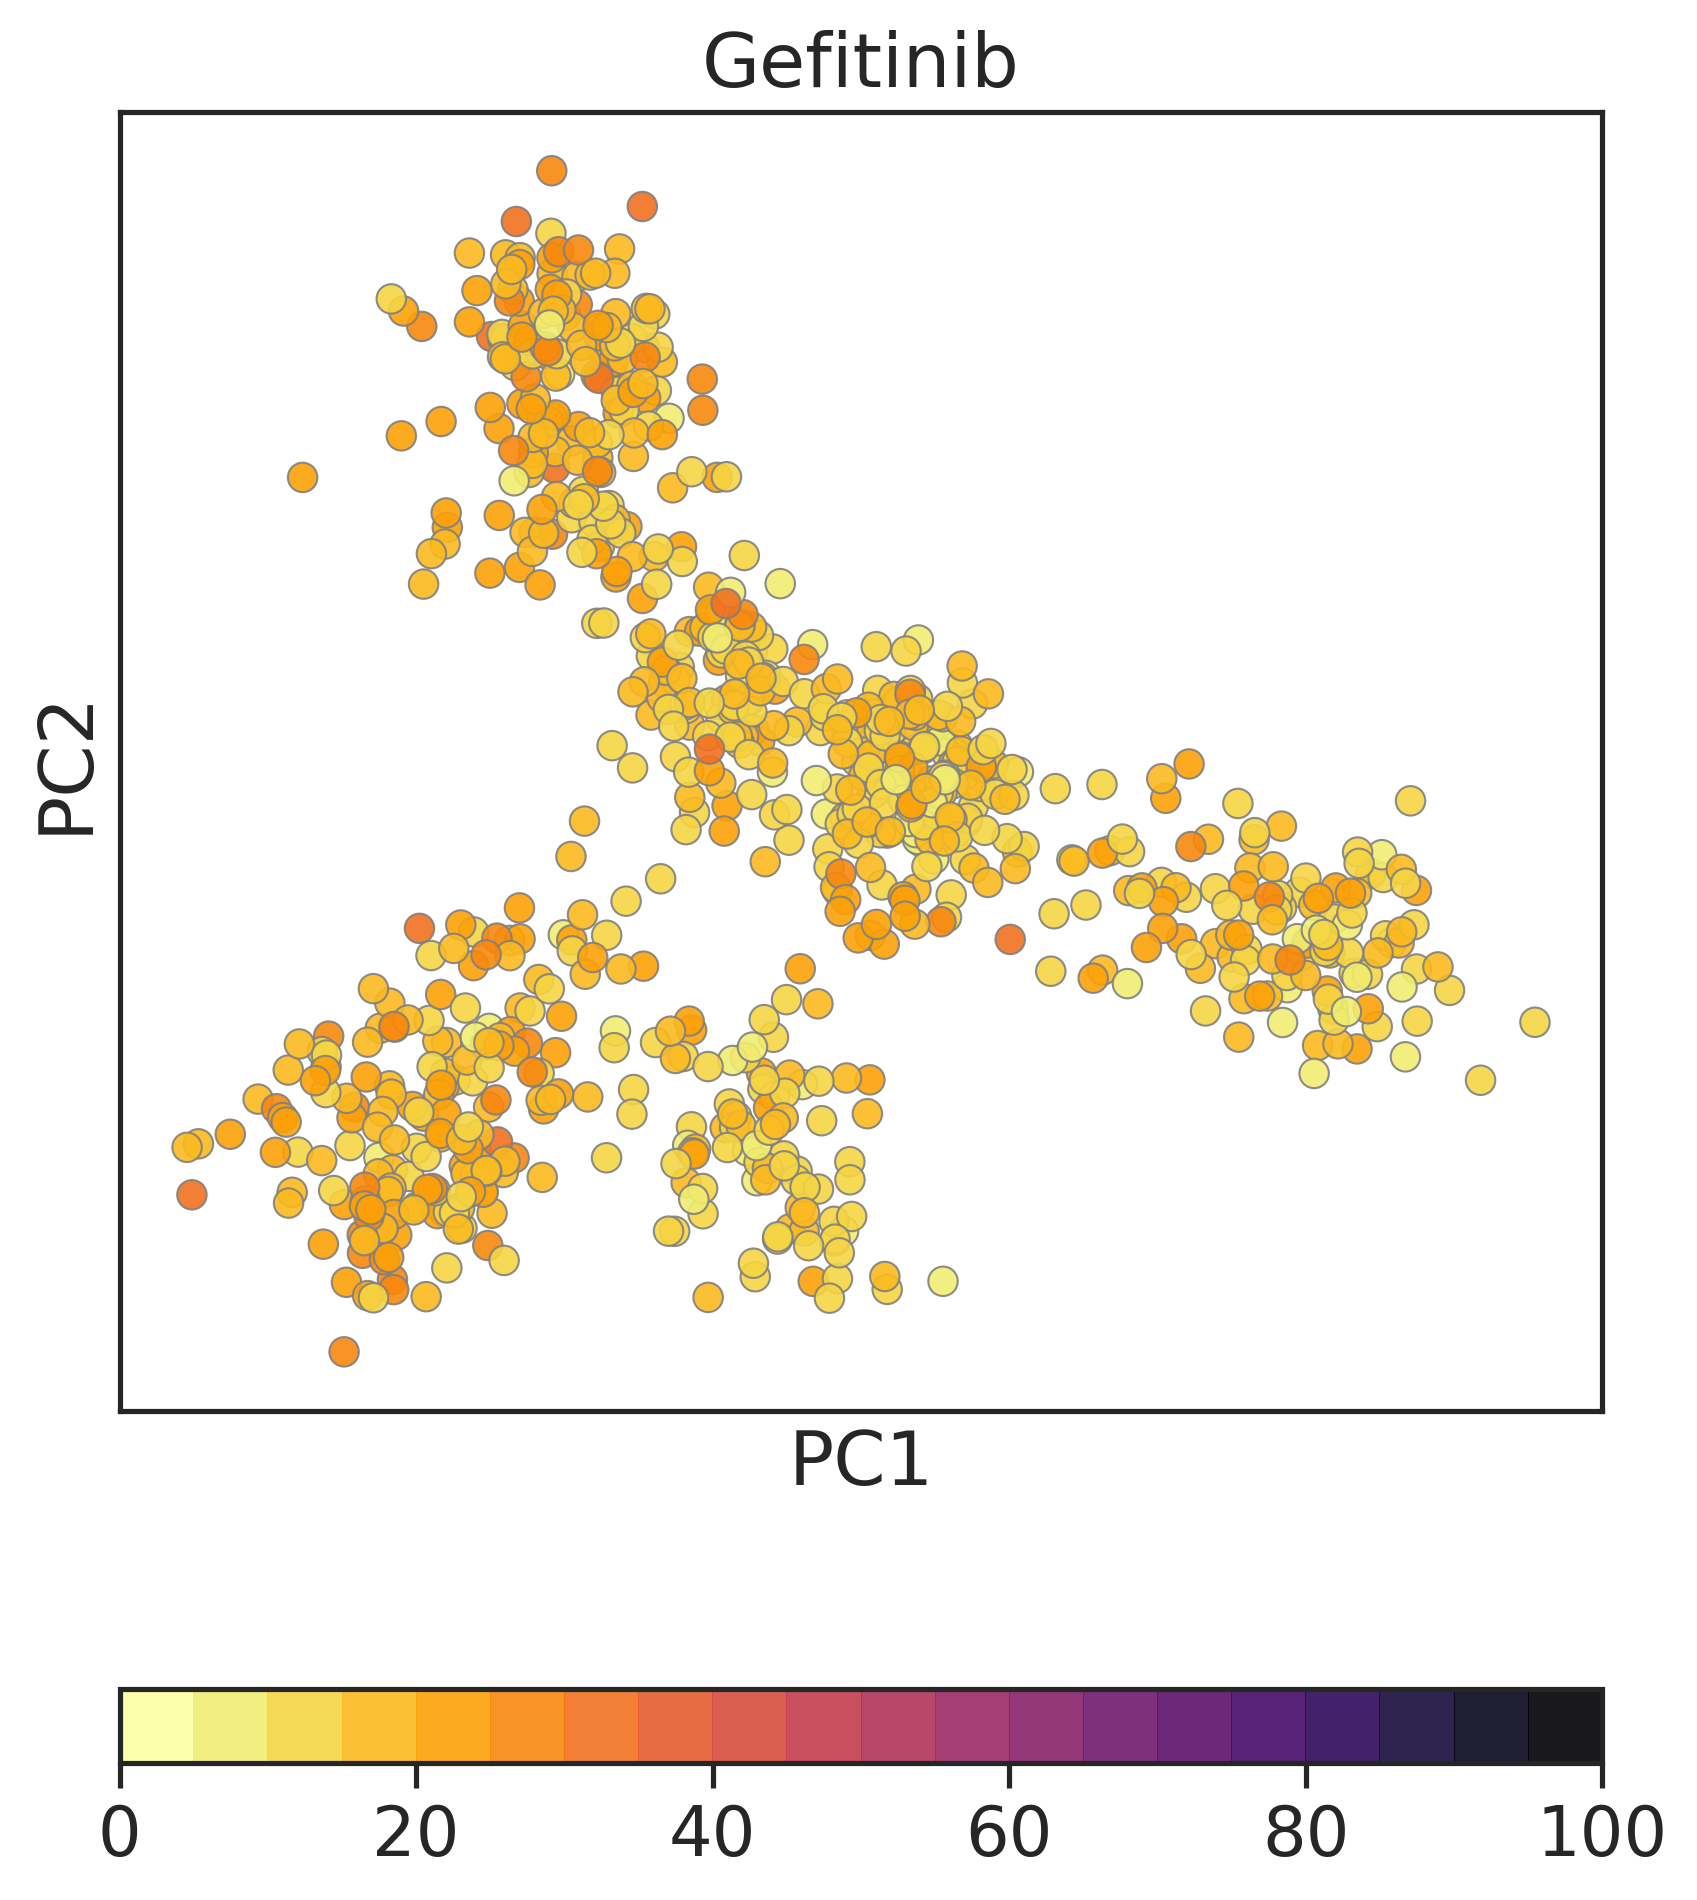

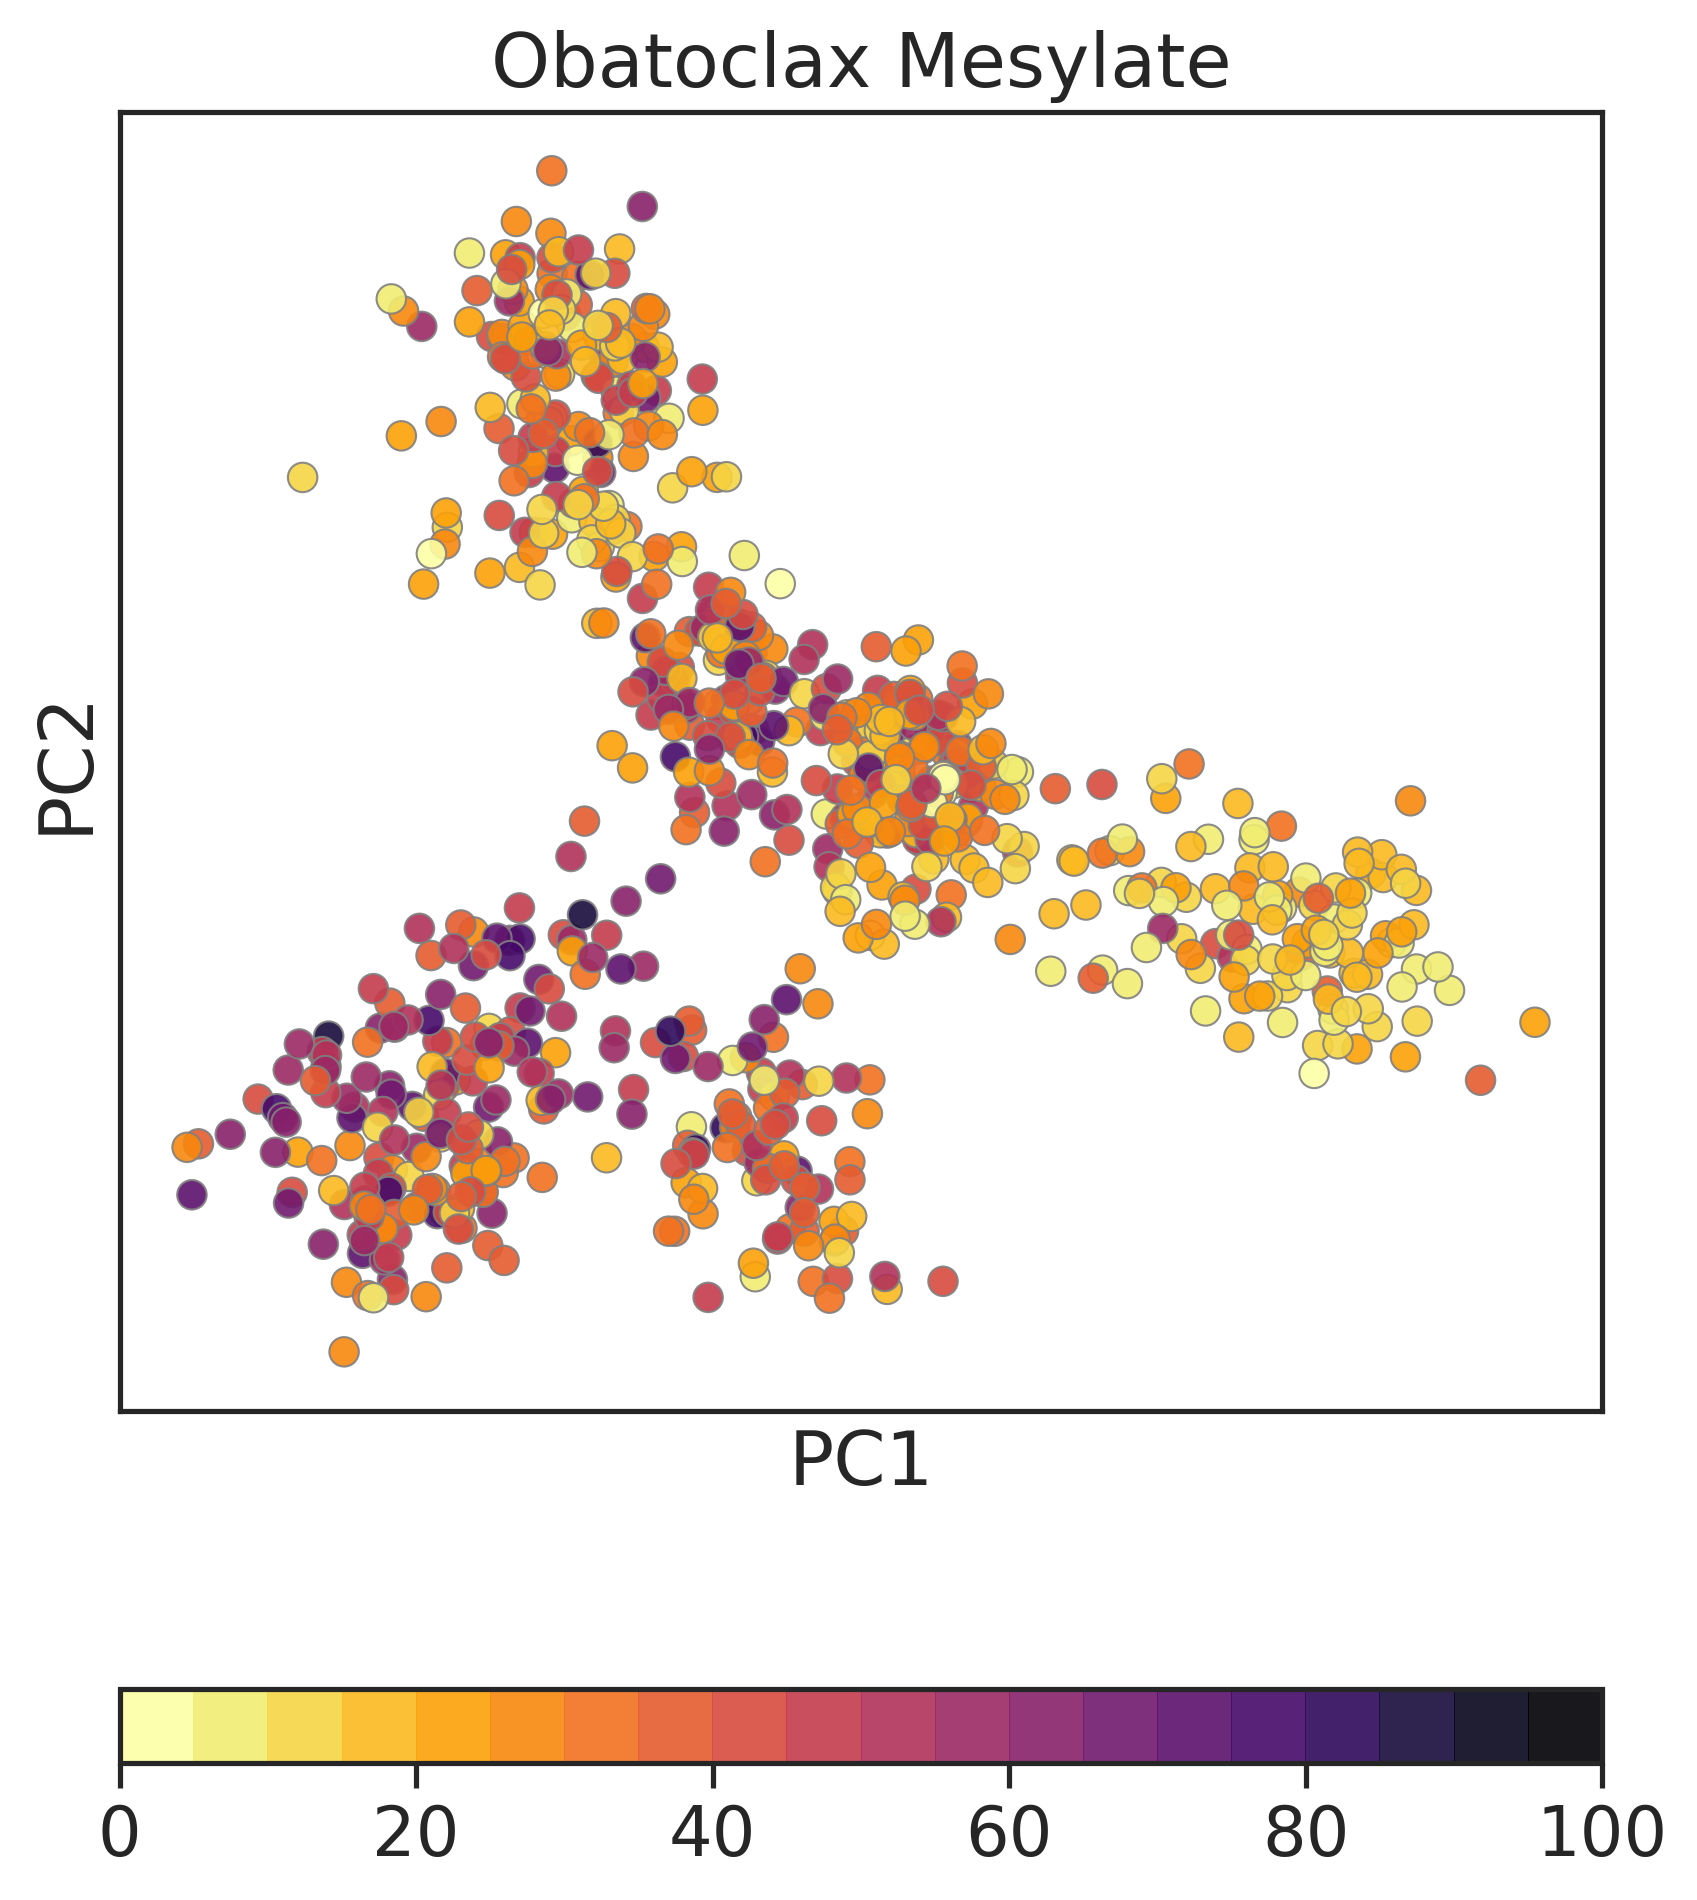

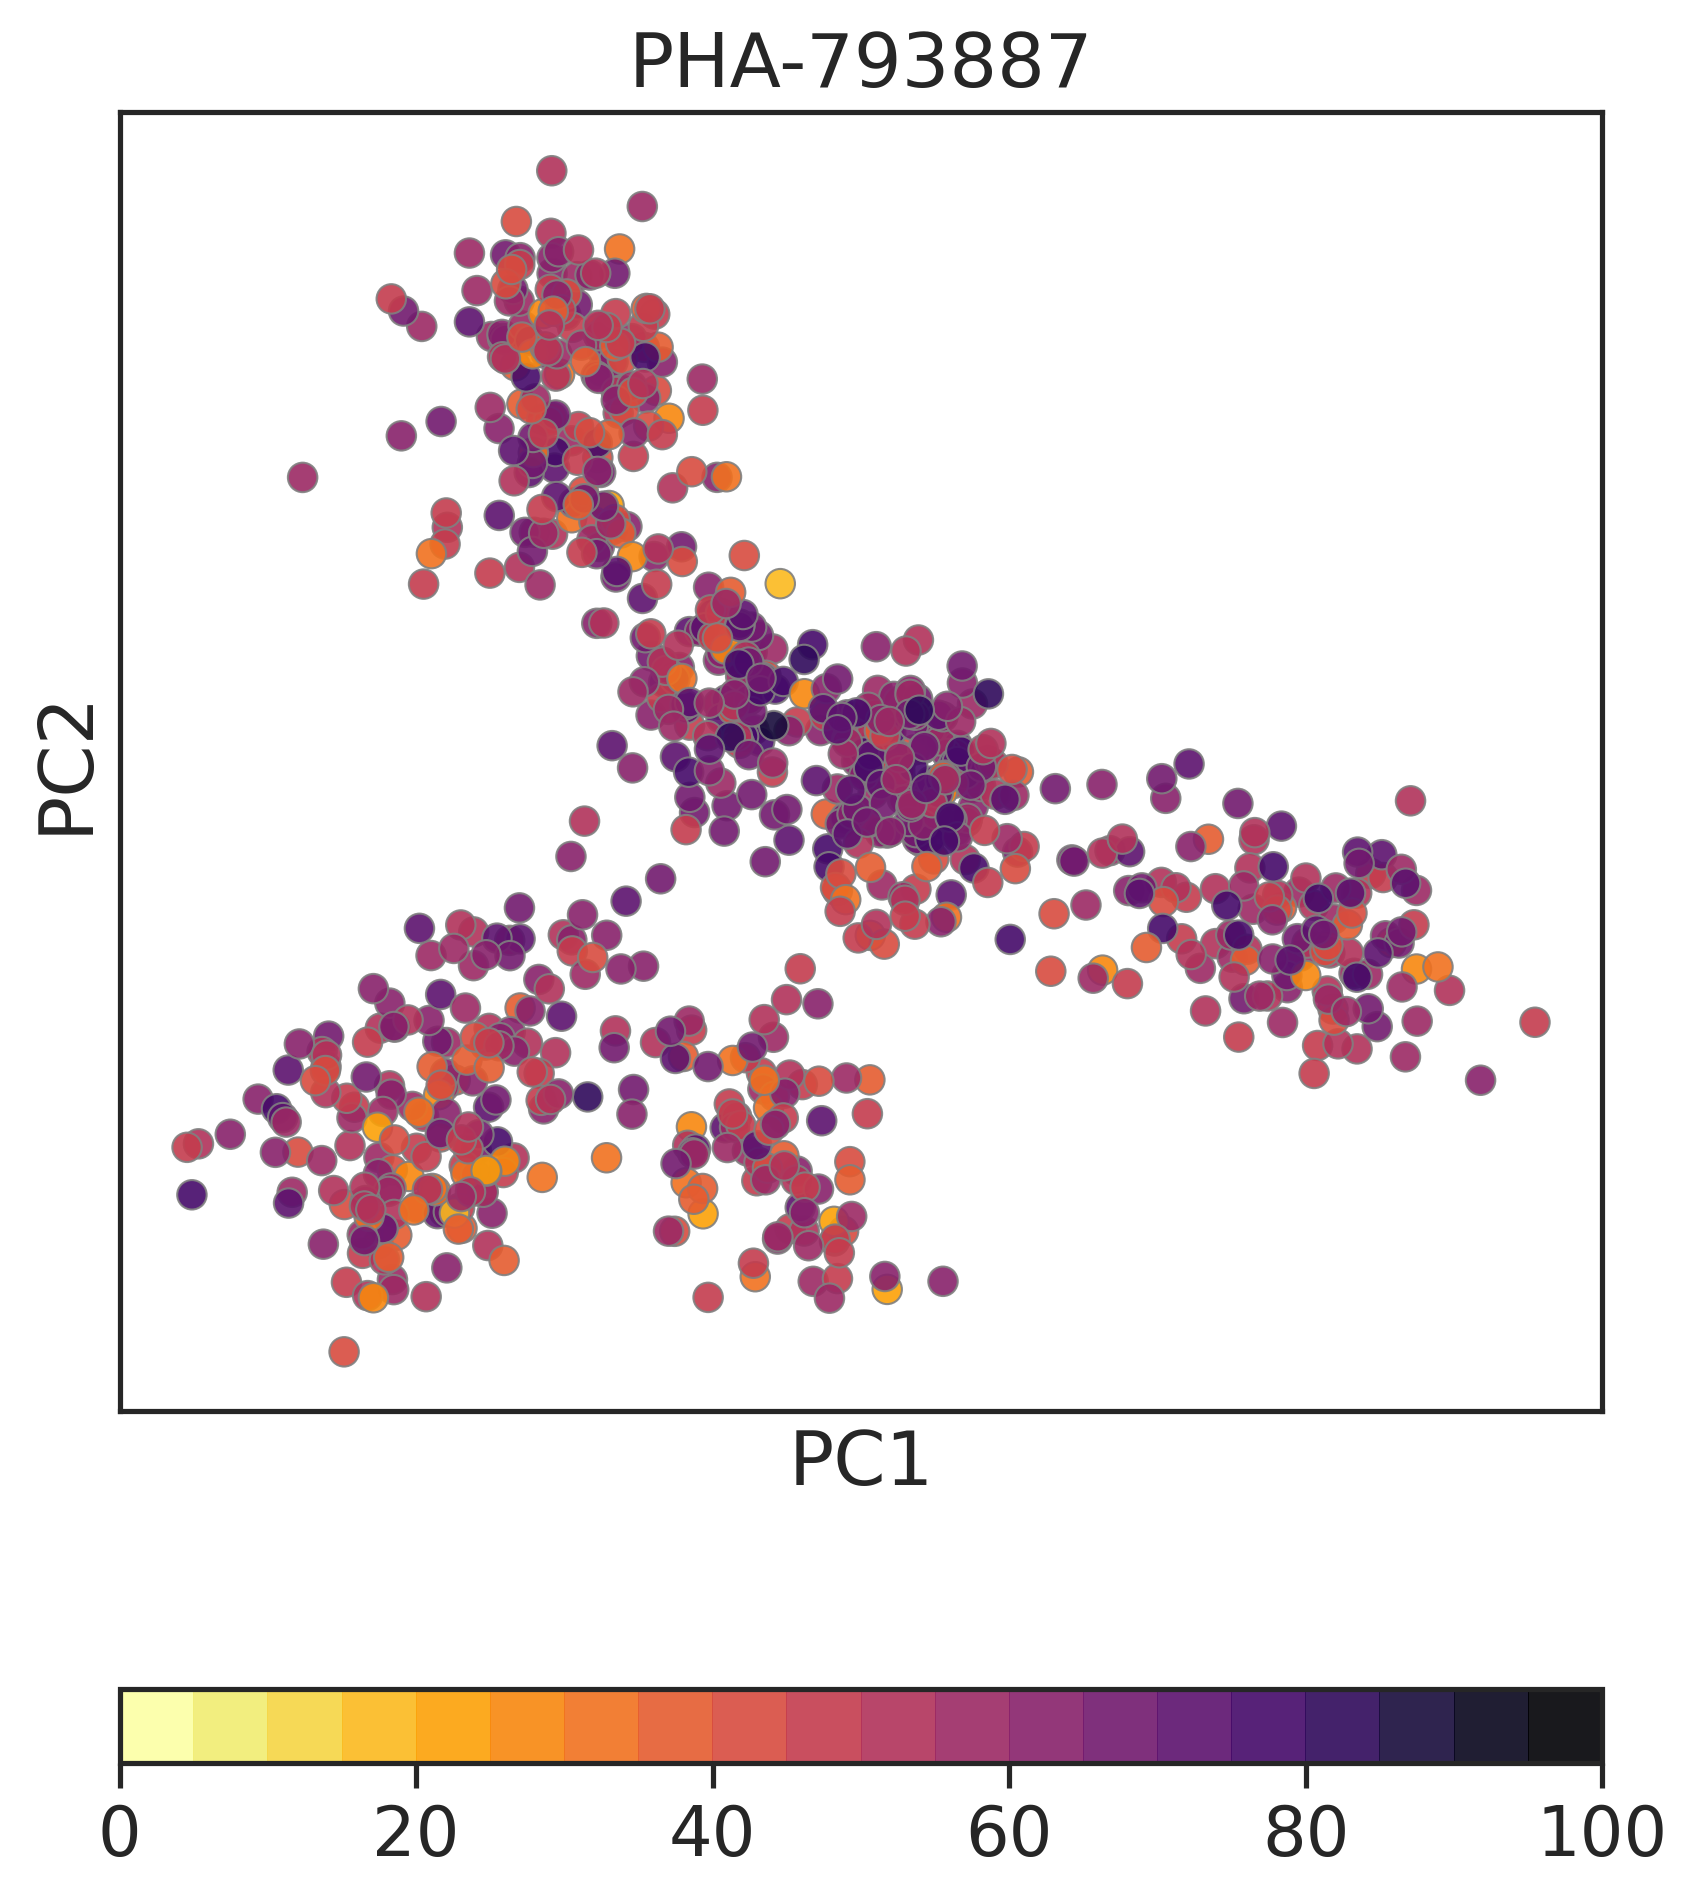

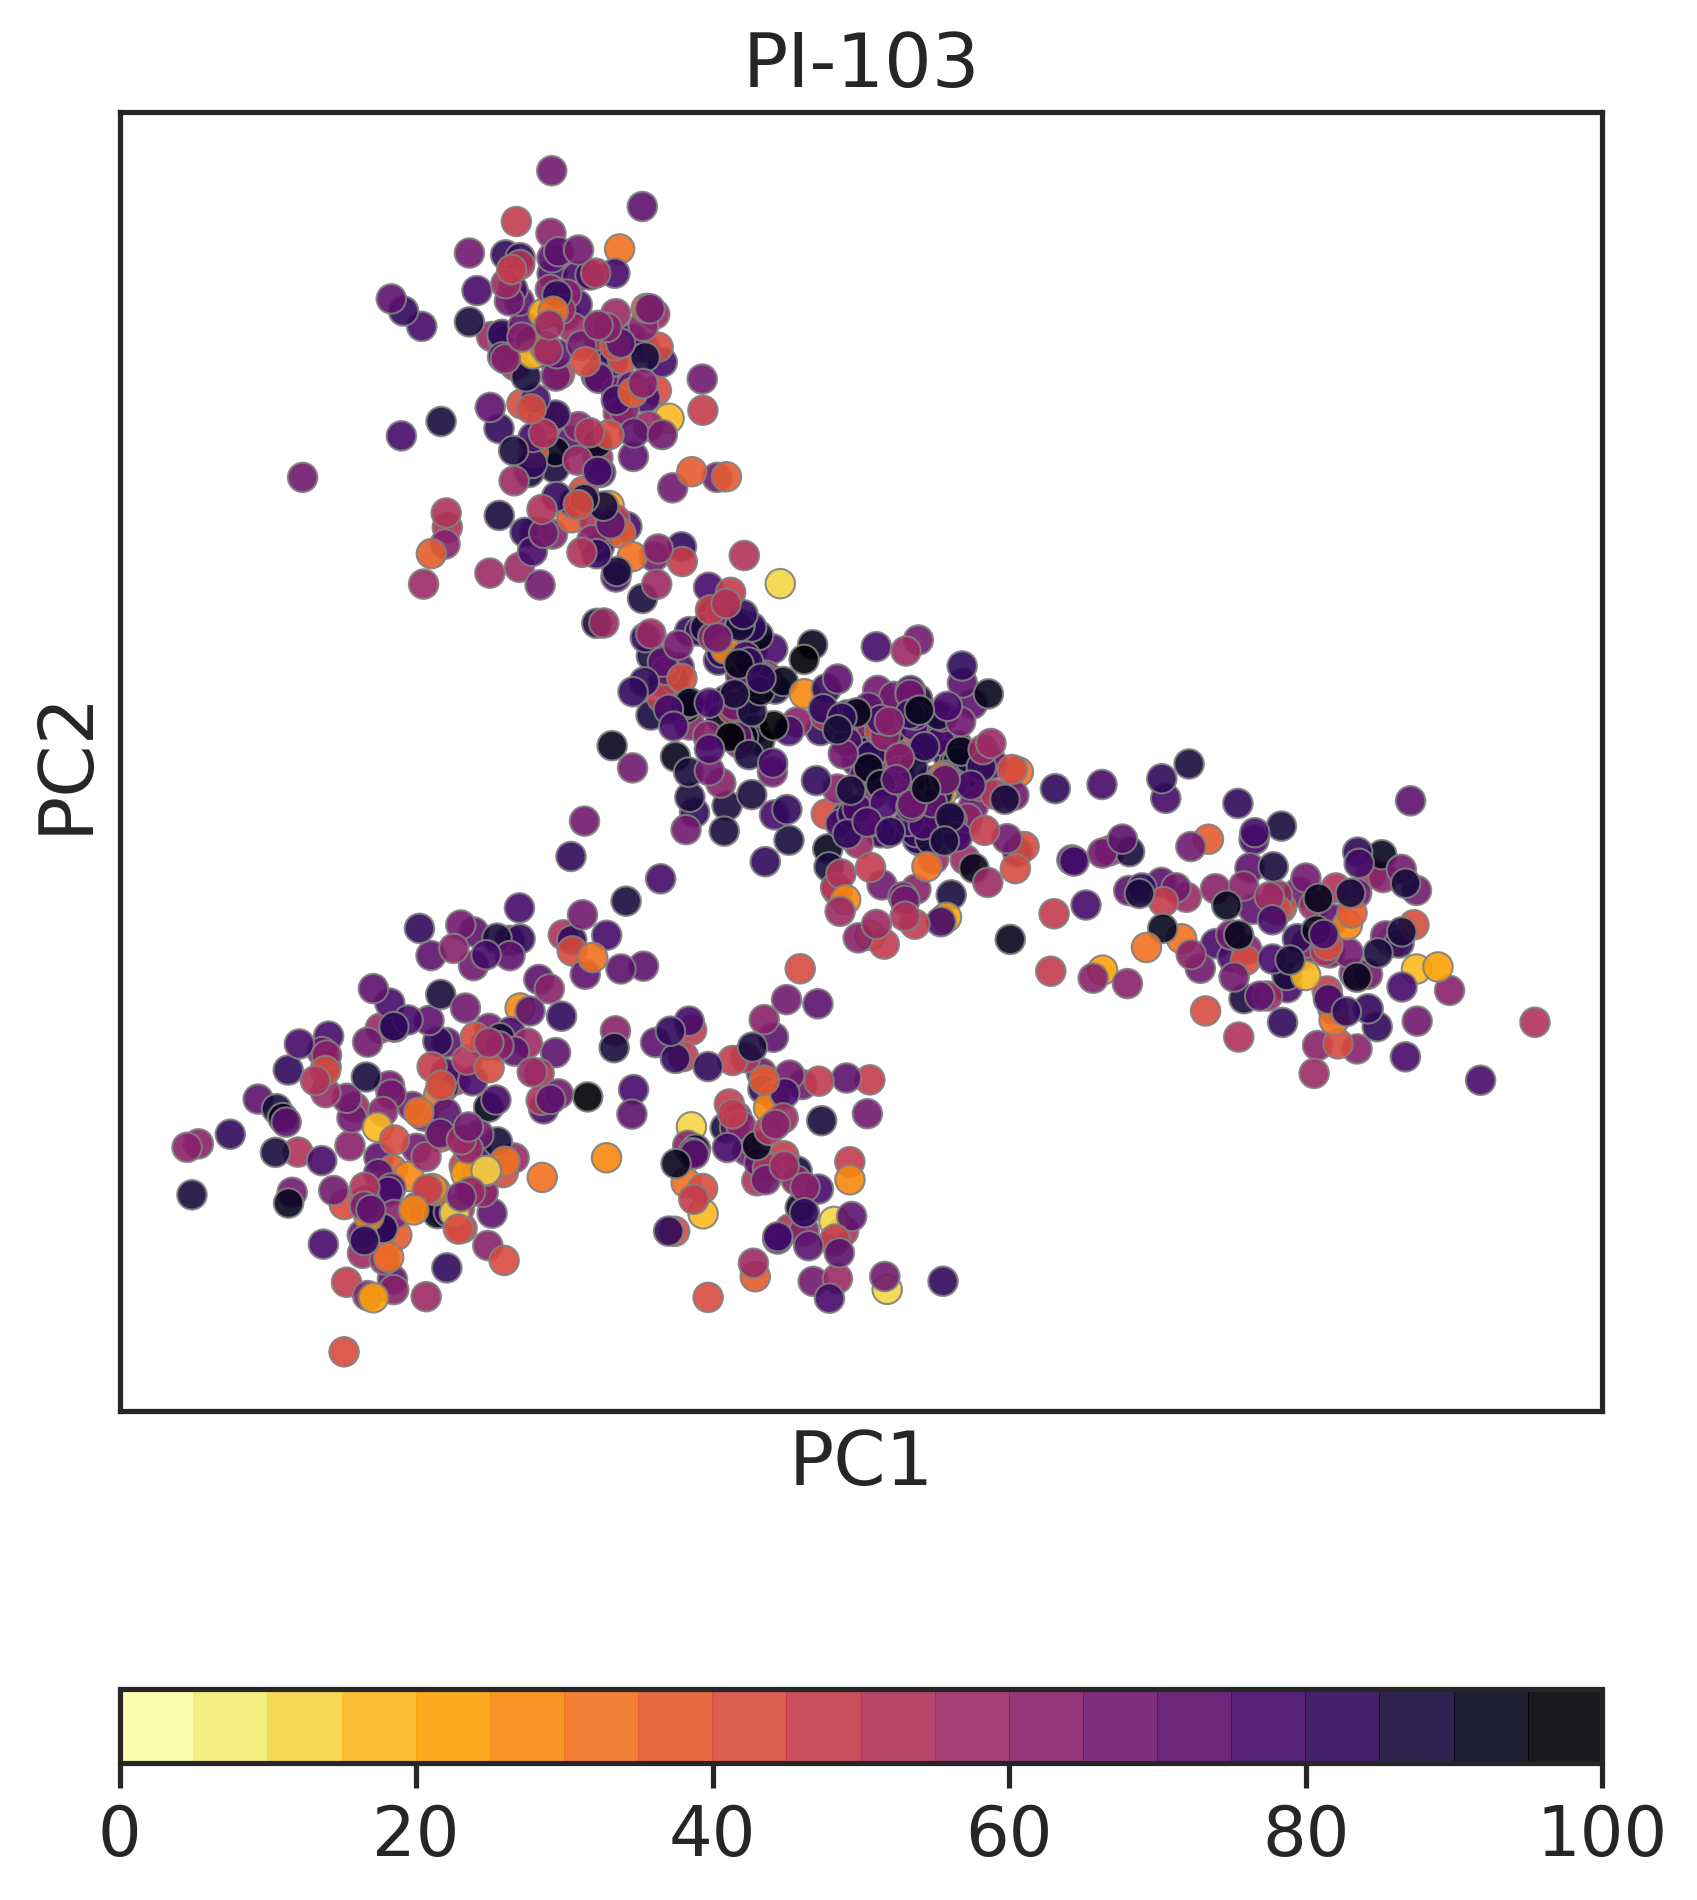

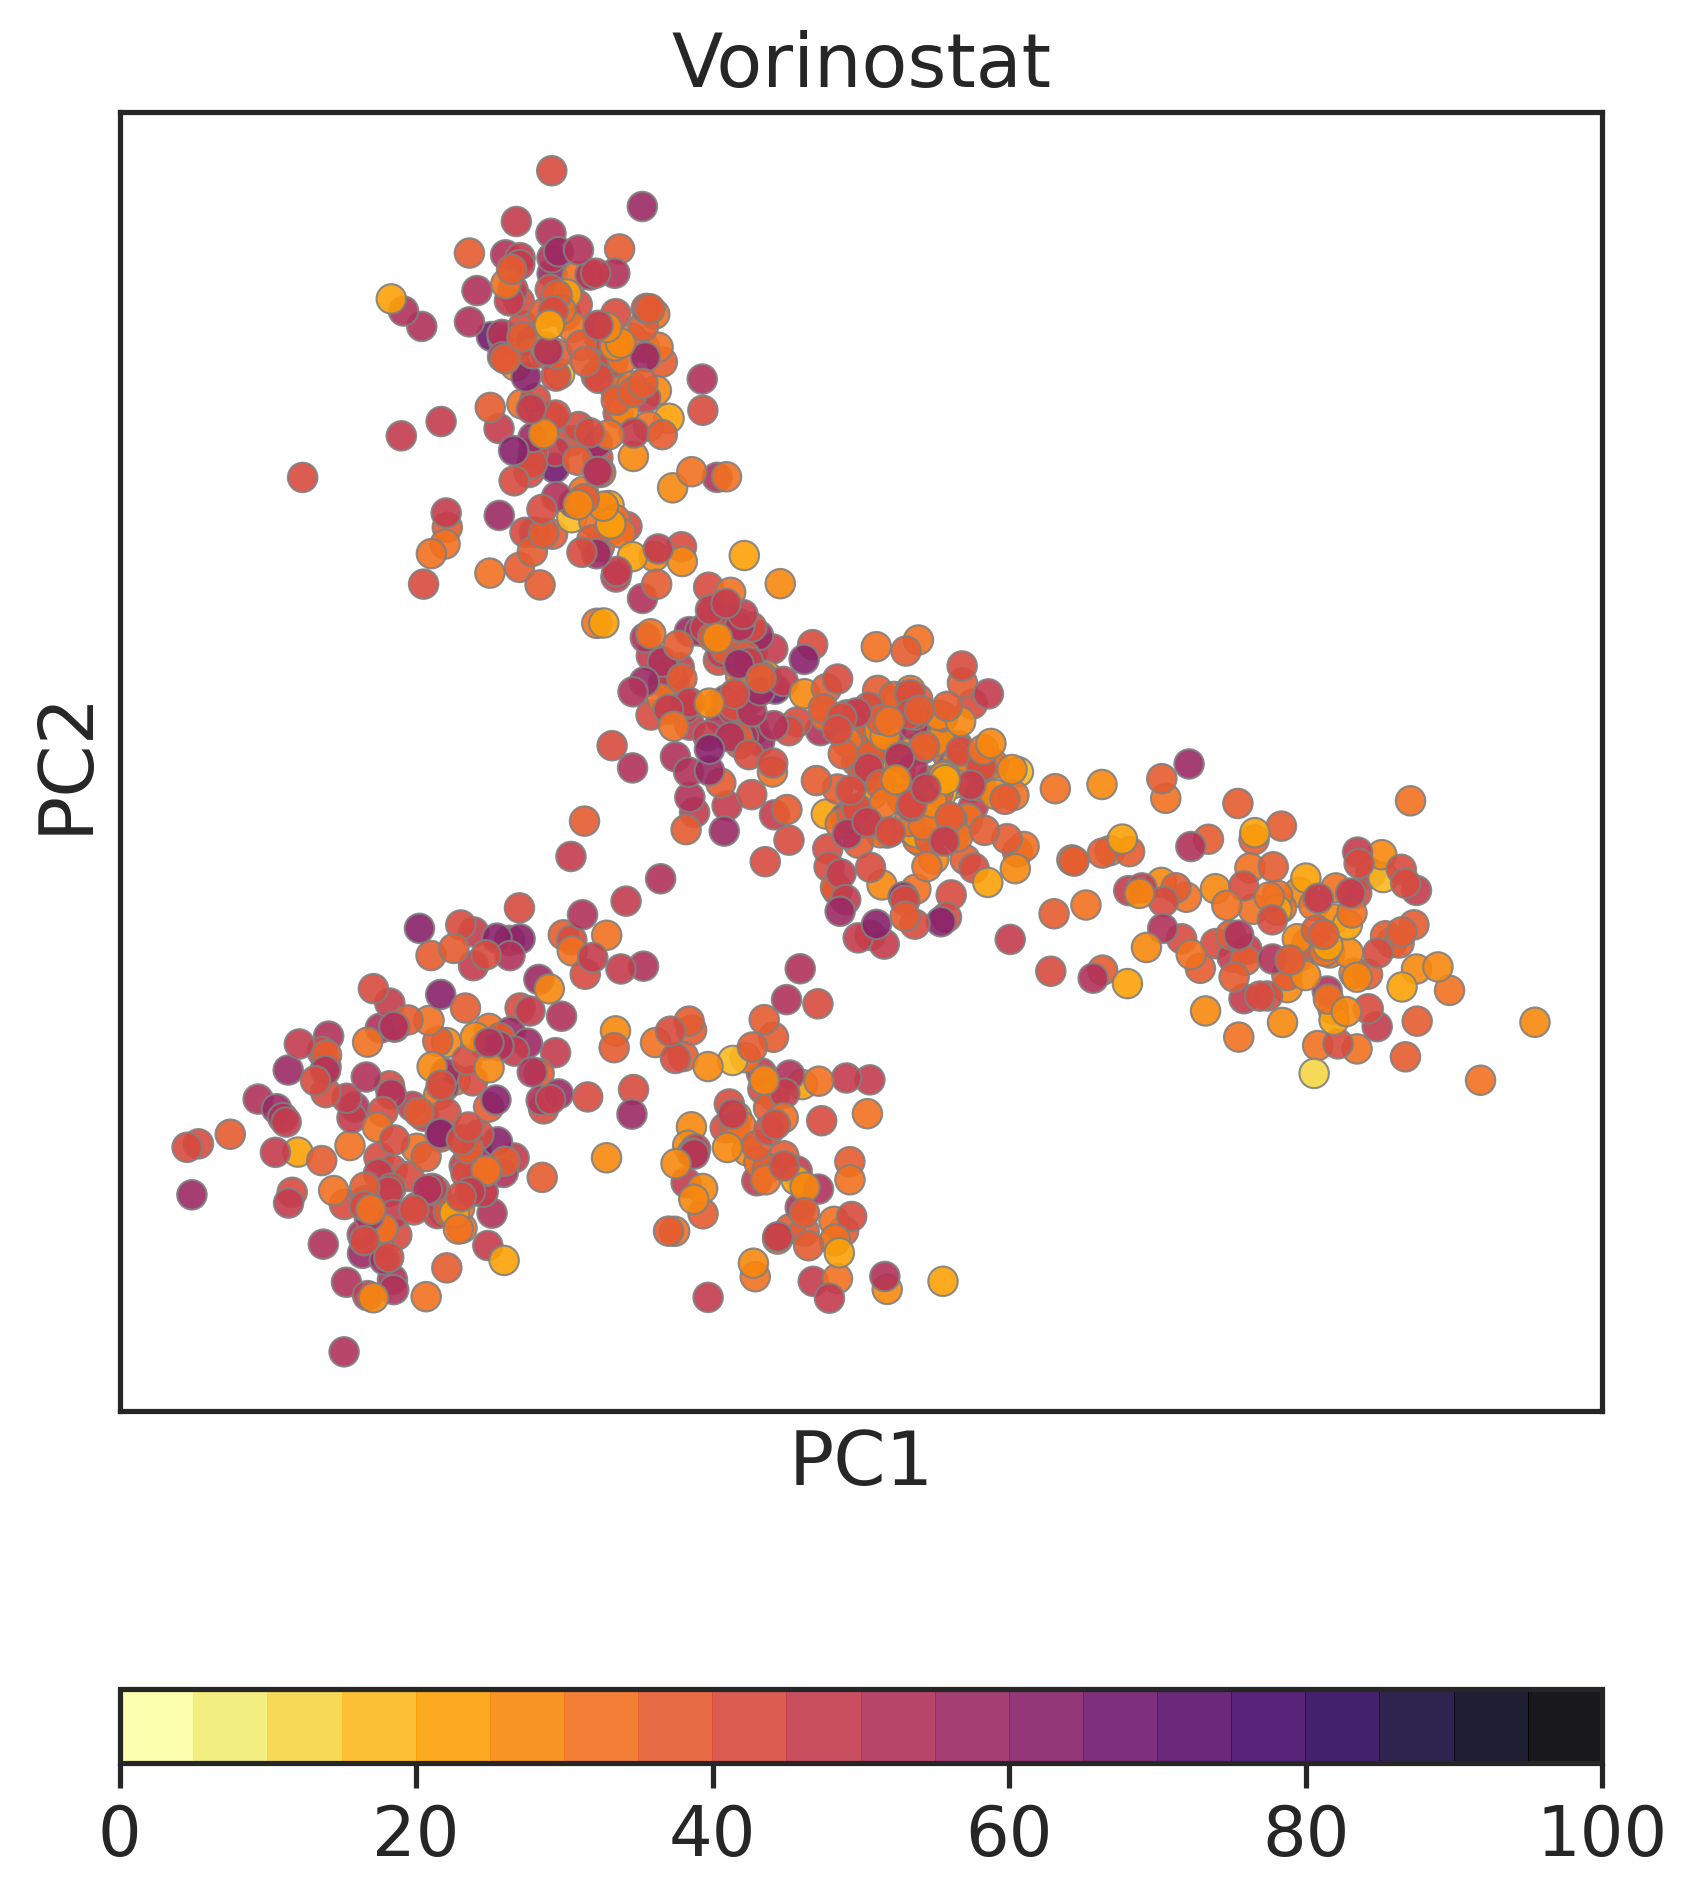

In [306]:
for drug_id, drug_name in zip(single_drug_id_list, single_drug_list):

    sns.set(font_scale=1.5, style='ticks')
    fig, ax = plt.subplots(figsize=(6,7))

    cmap = plt.cm.get_cmap('inferno_r', 20)
    norm = plt.Normalize(vmin=0, vmax=100)
    
    # sns.scatterplot(data=df, x='PC1', y='PC2', hue='Epothilone B', s=50, alpha=.8, linewidth=0.5, palette=cmap, hue_norm=norm, edgecolor='grey', ax=ax)
    points = ax.scatter(cell_pred_df['PC1'], cell_pred_df['PC2'], c=cell_pred_df[str(drug_id)], s=50, linewidth=0.5, alpha=0.9, edgecolor='grey', cmap=cmap, norm=norm) # , norm=norm
    # fig.colorbar(points)
    fig.colorbar(points, orientation='horizontal')

    # cbar=m.colorbar(trend, size='3%',ticks=bounds,extend="max",location=bottom)

    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    
    ax.set_title(drug_name)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white', ncol=1, fontsize='medium', framealpha=0, markerscale=1.5, title='Patient ID')

    plt.tight_layout()

    plt.savefig('../figure/Fig3B_PCA_response_{}.svg'.format(drug_name))

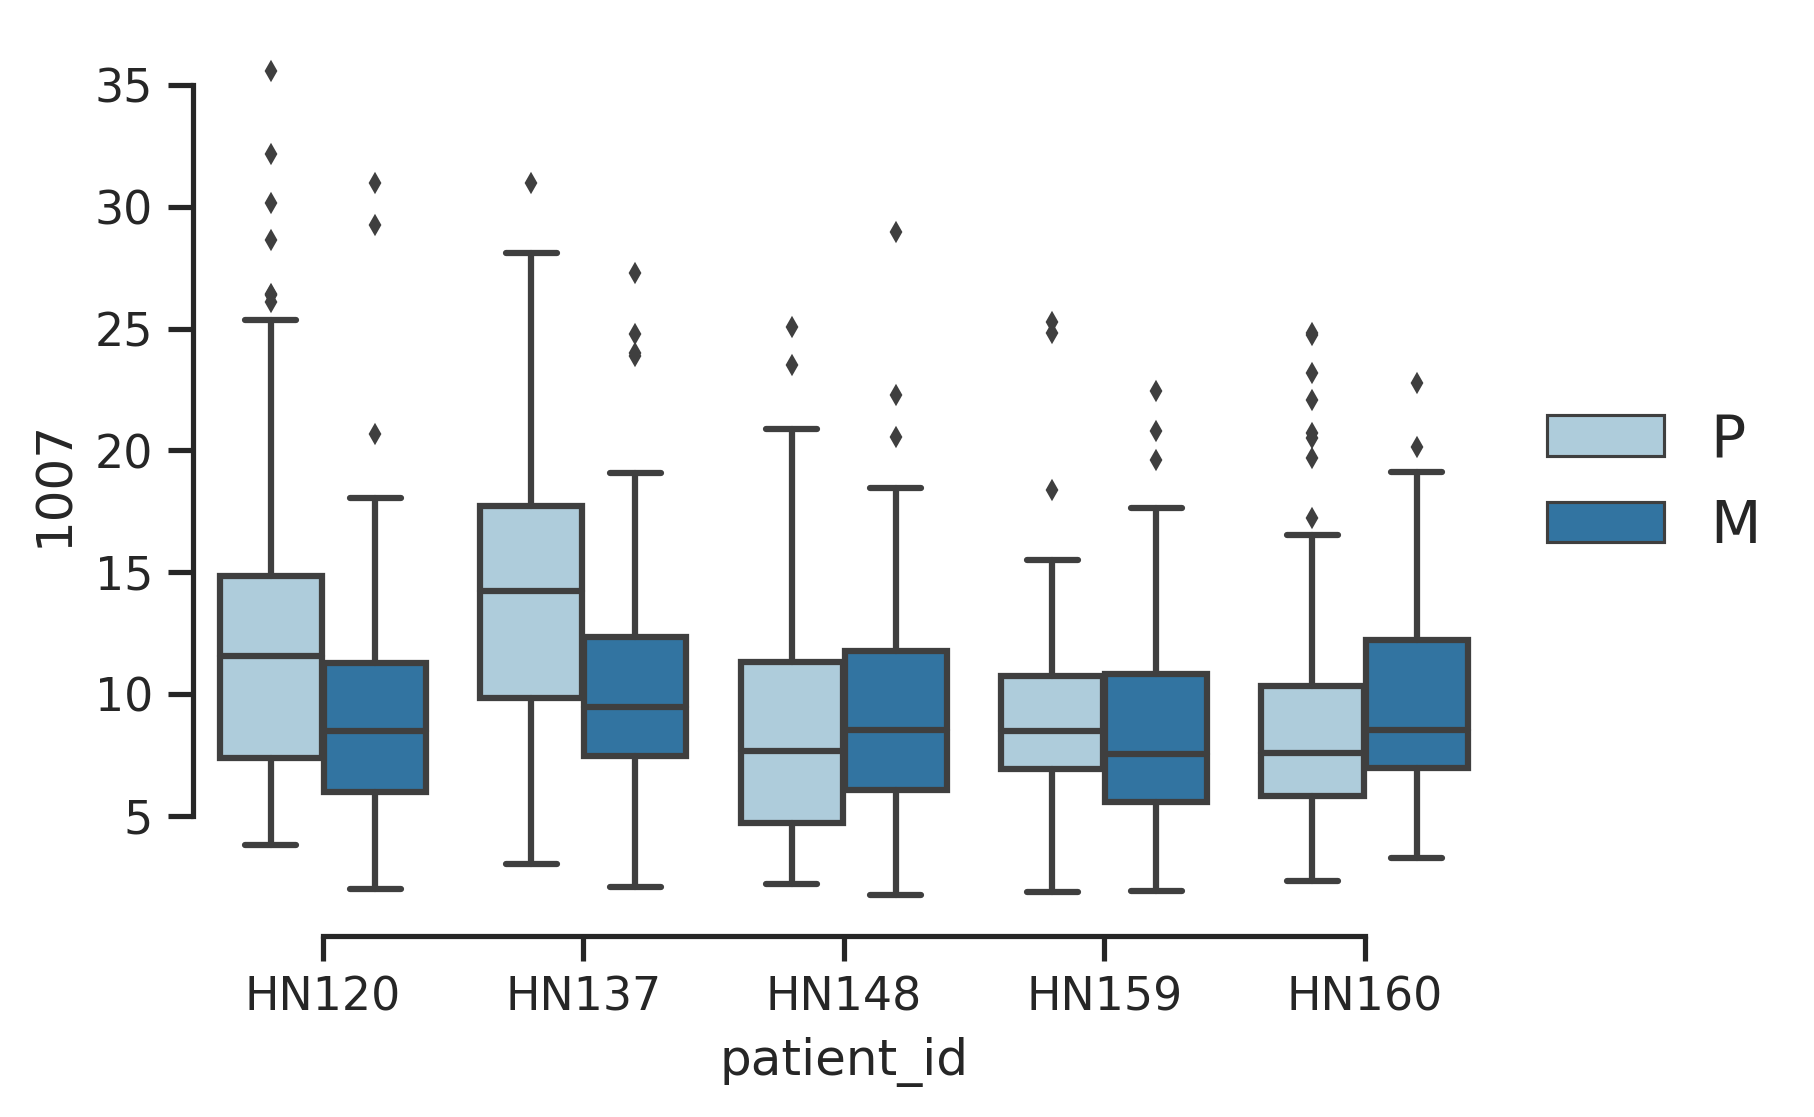

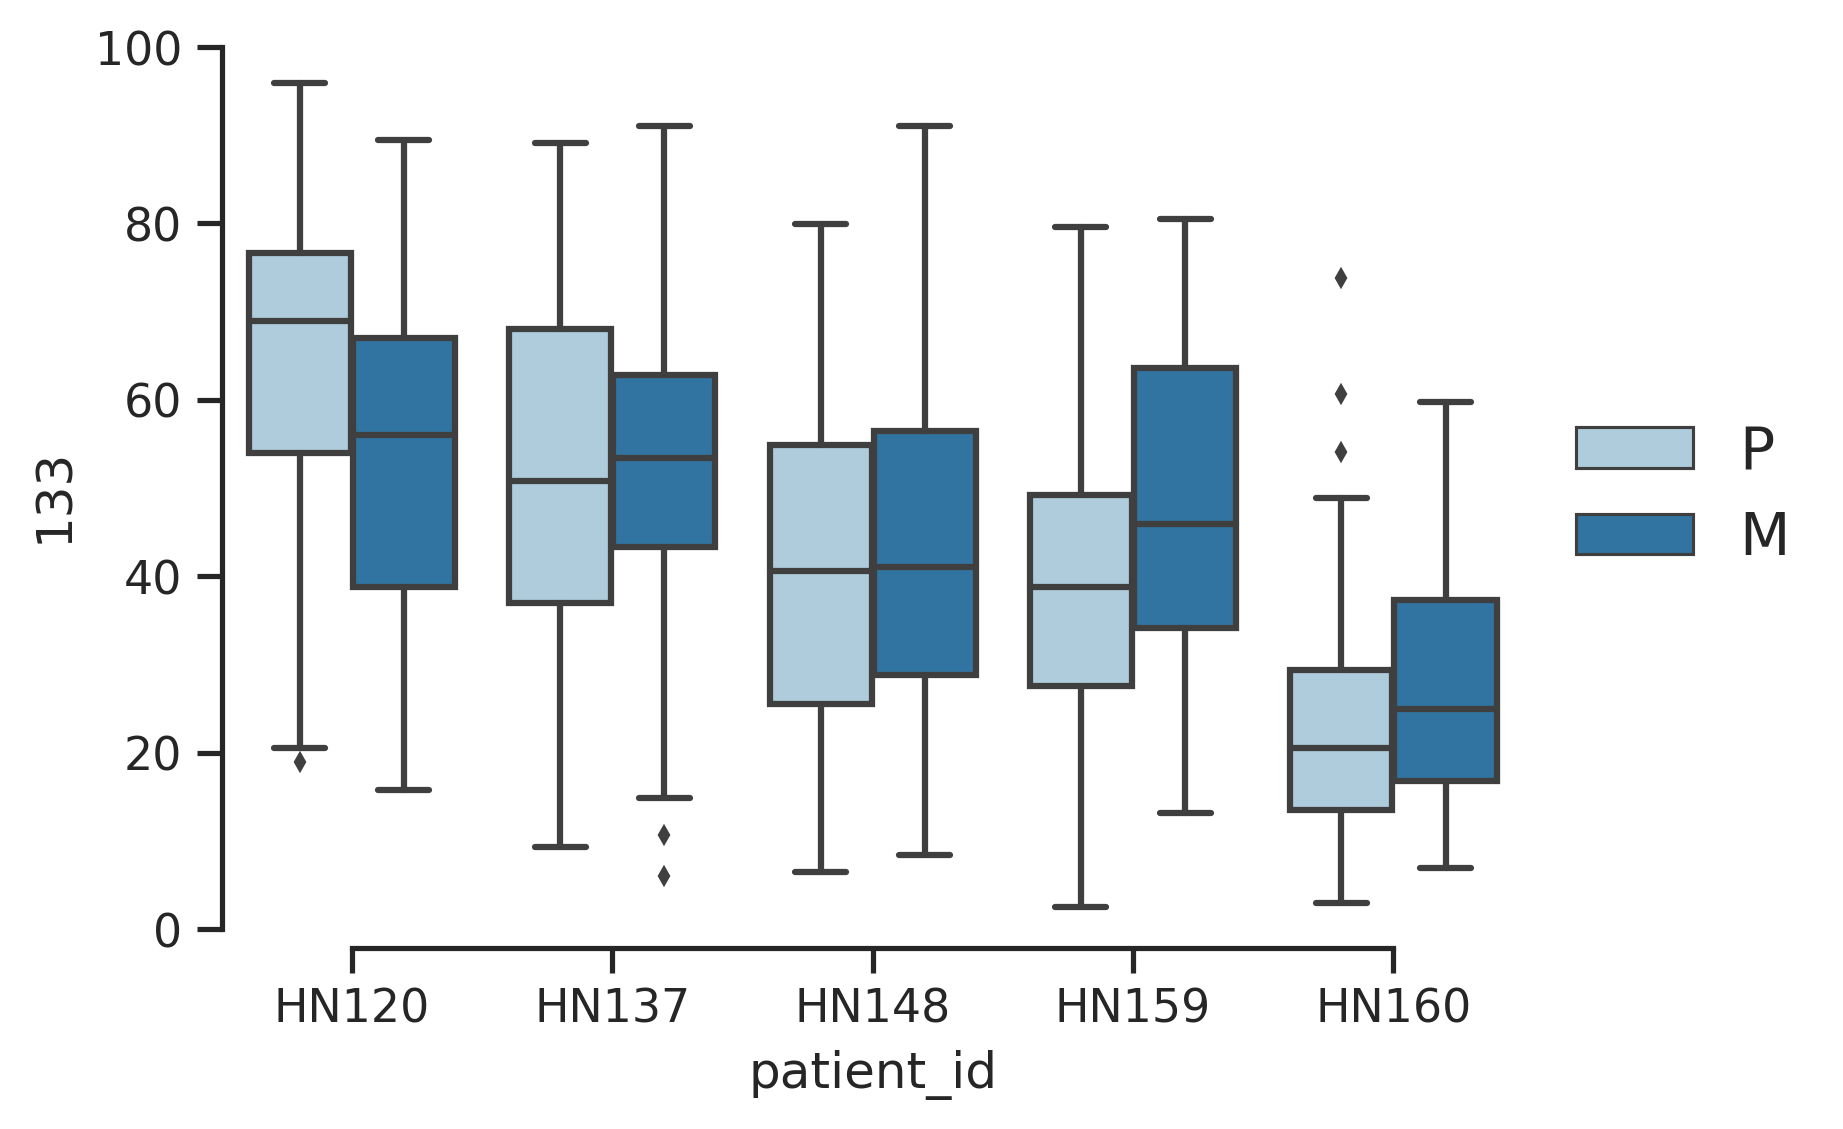

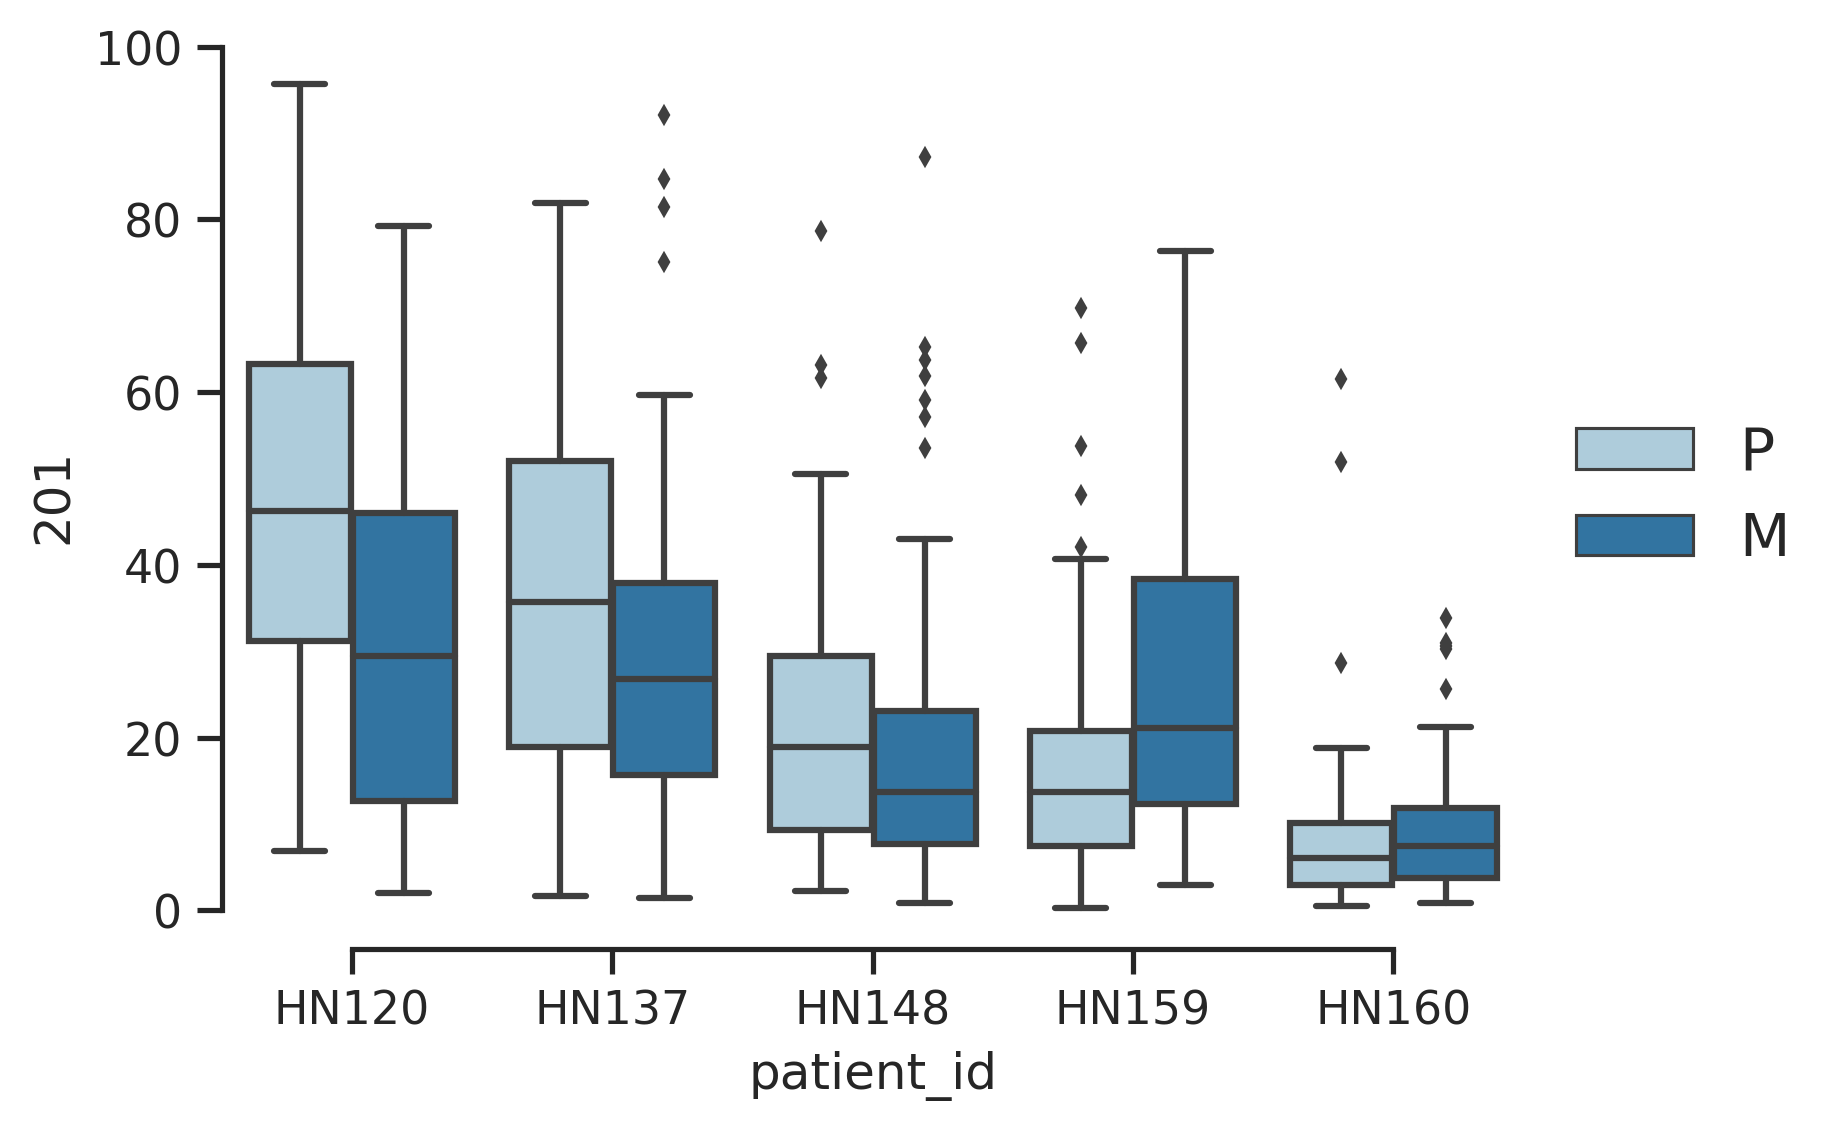

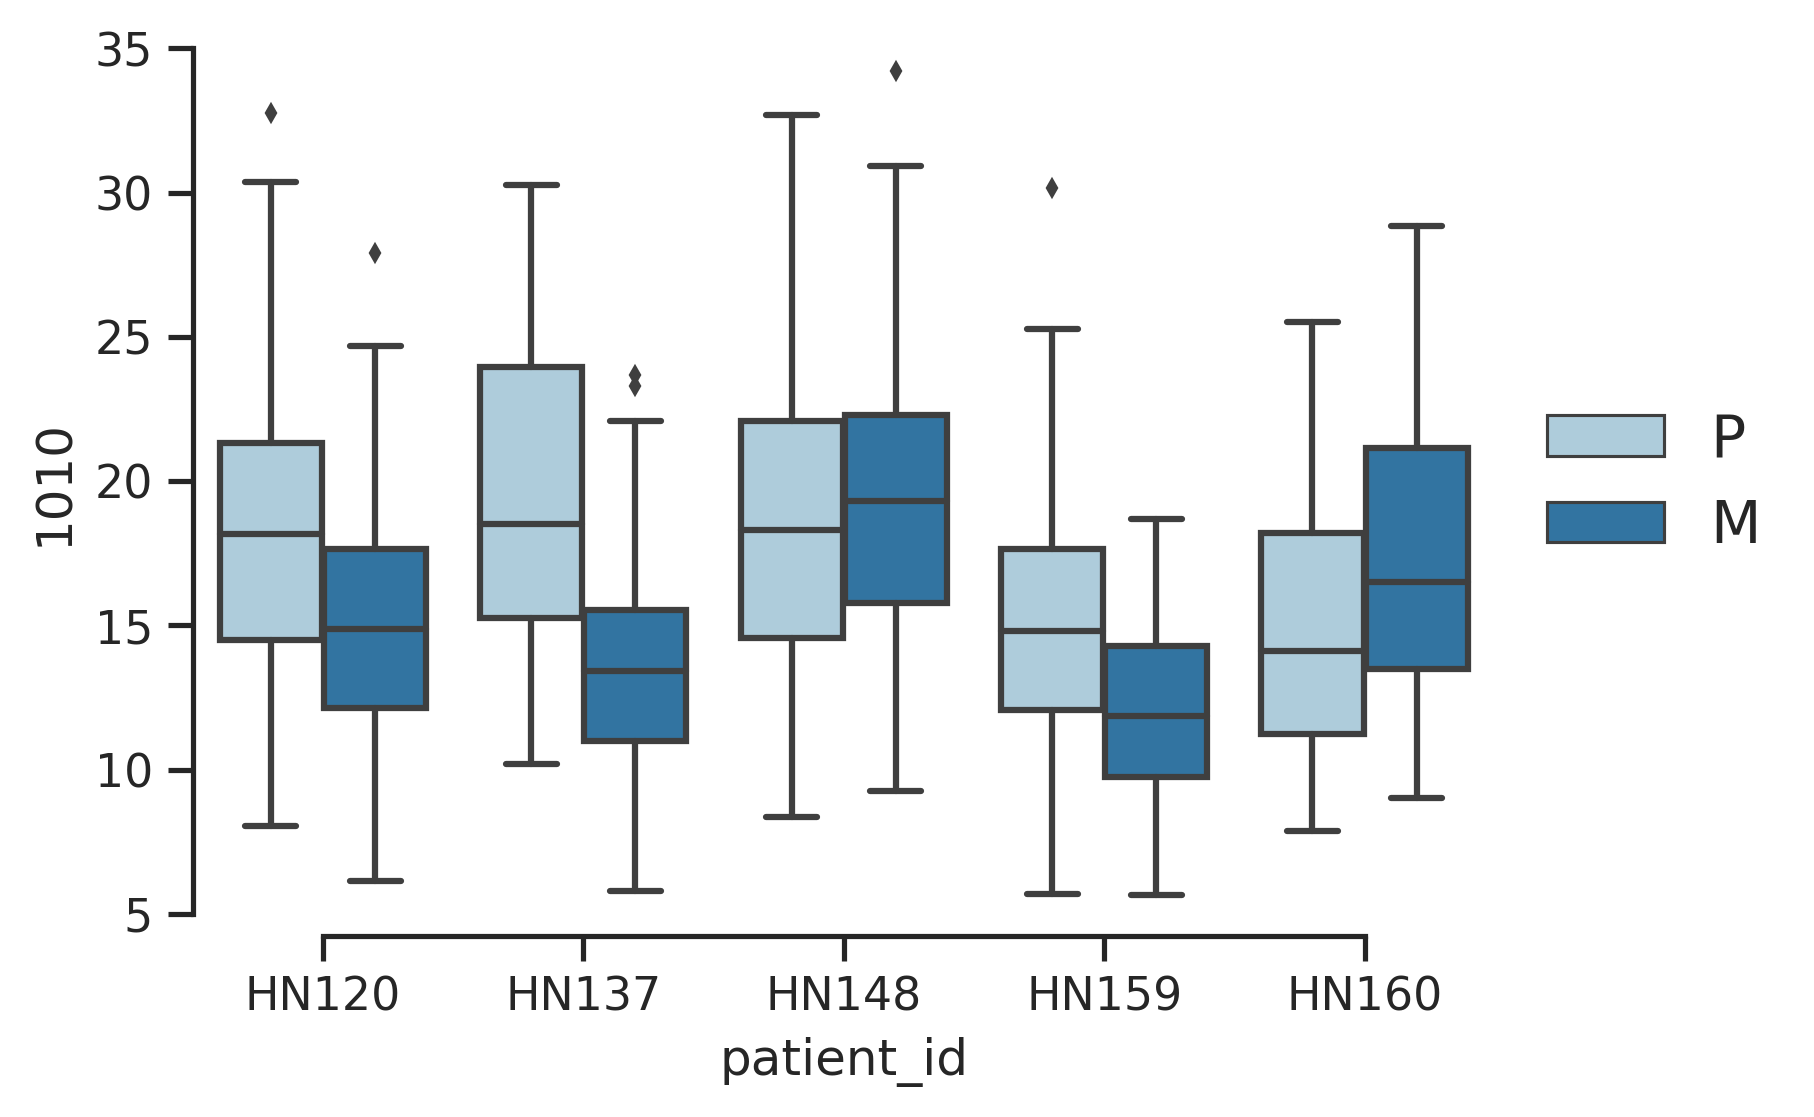

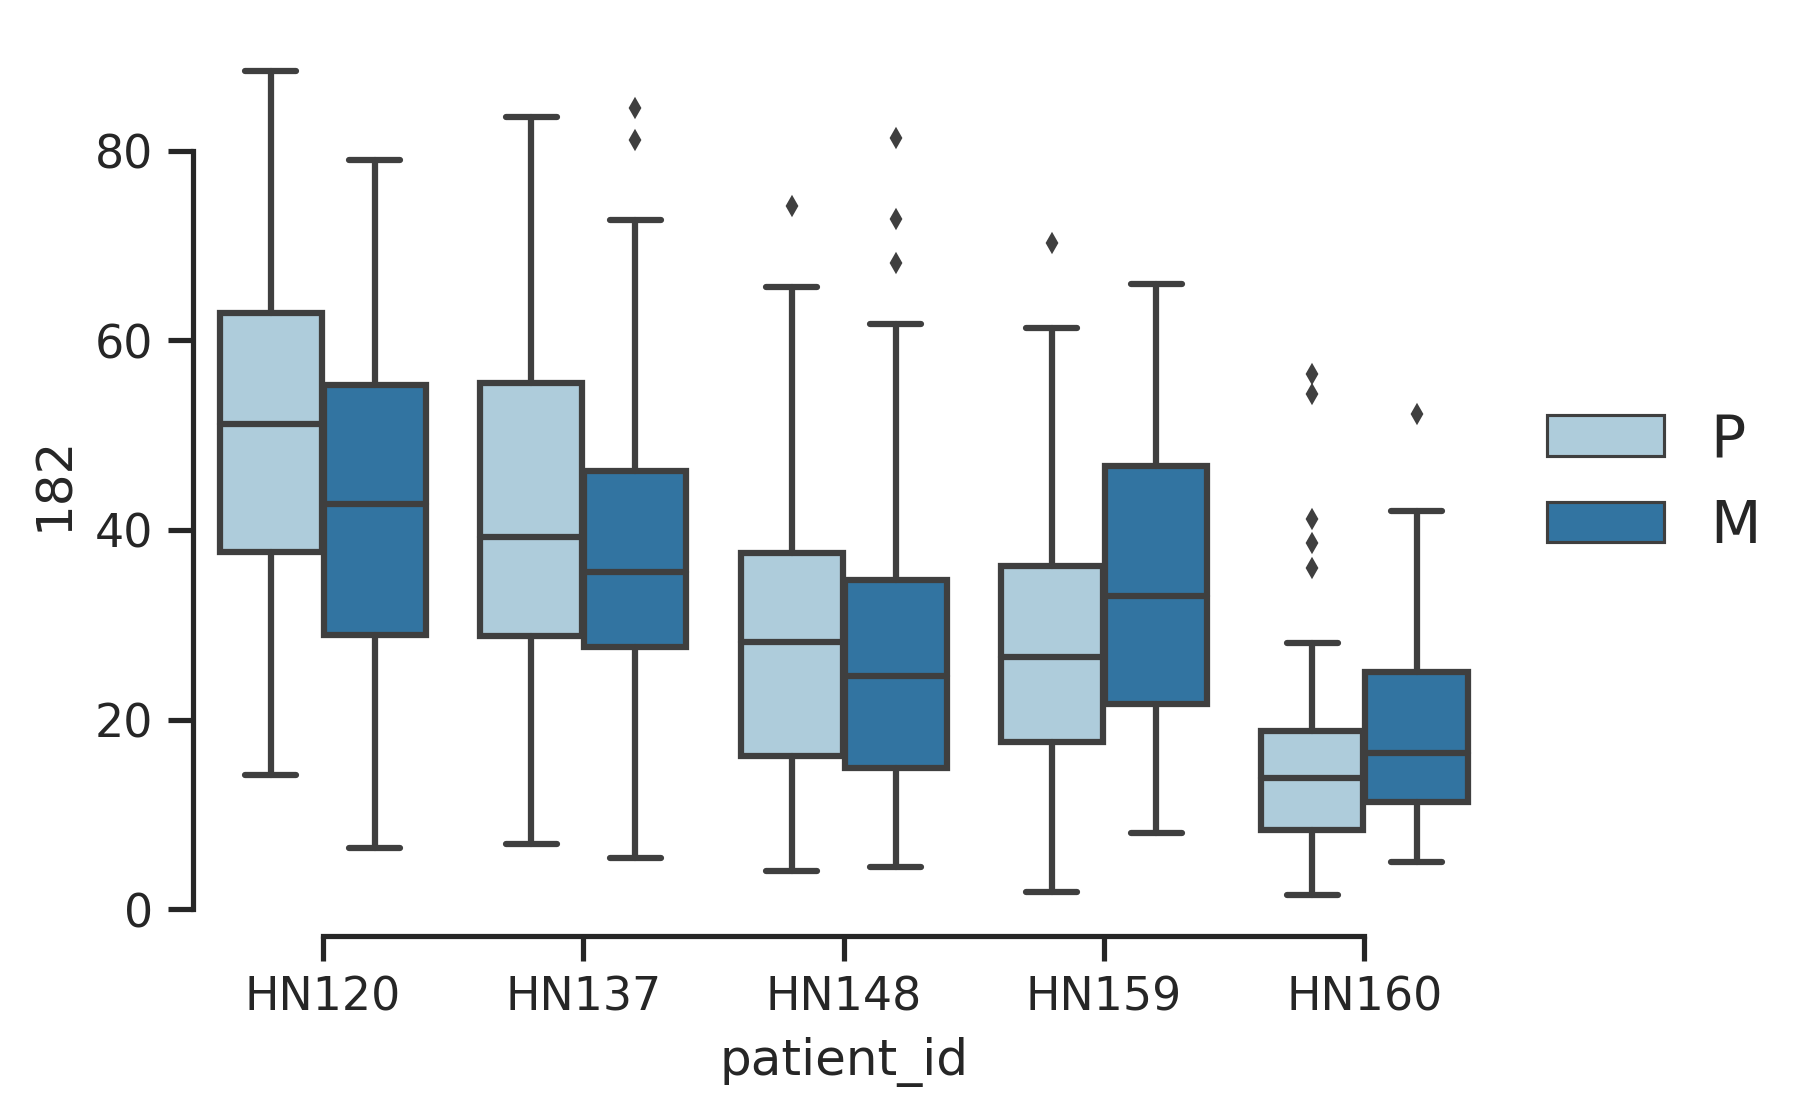

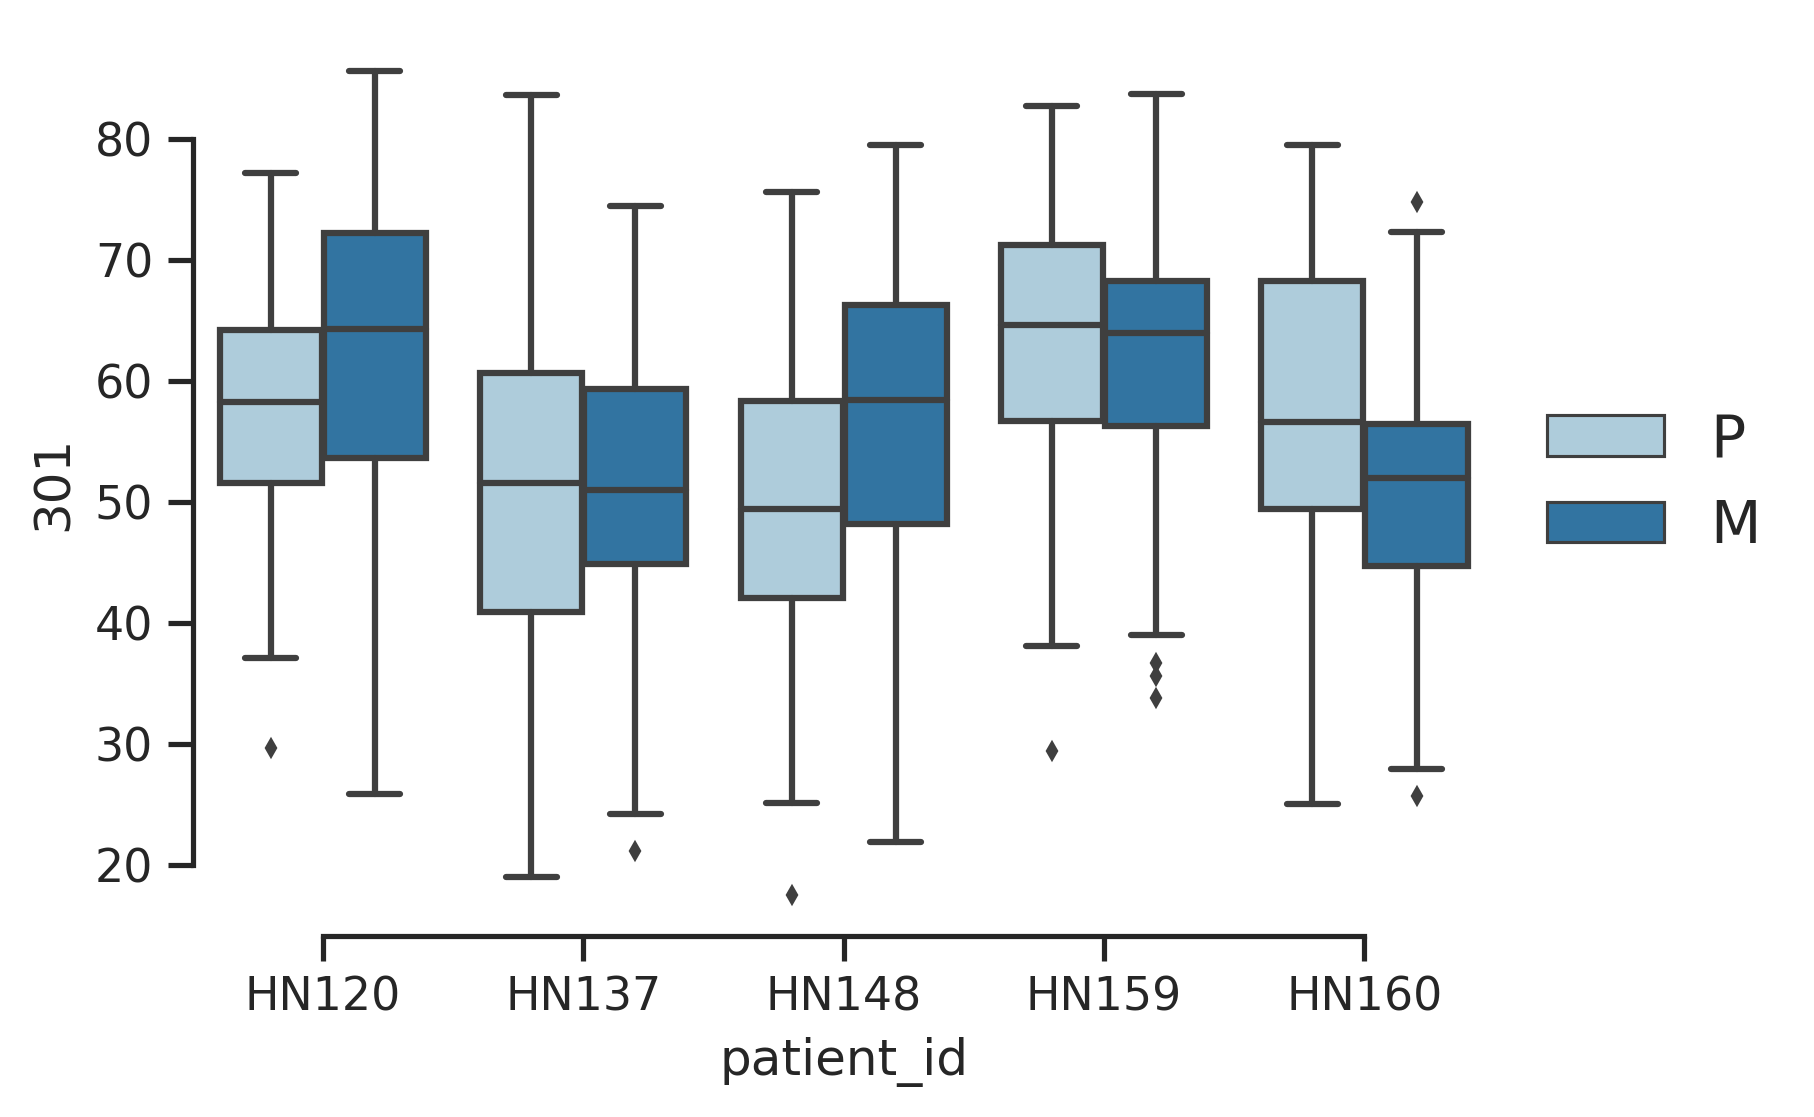

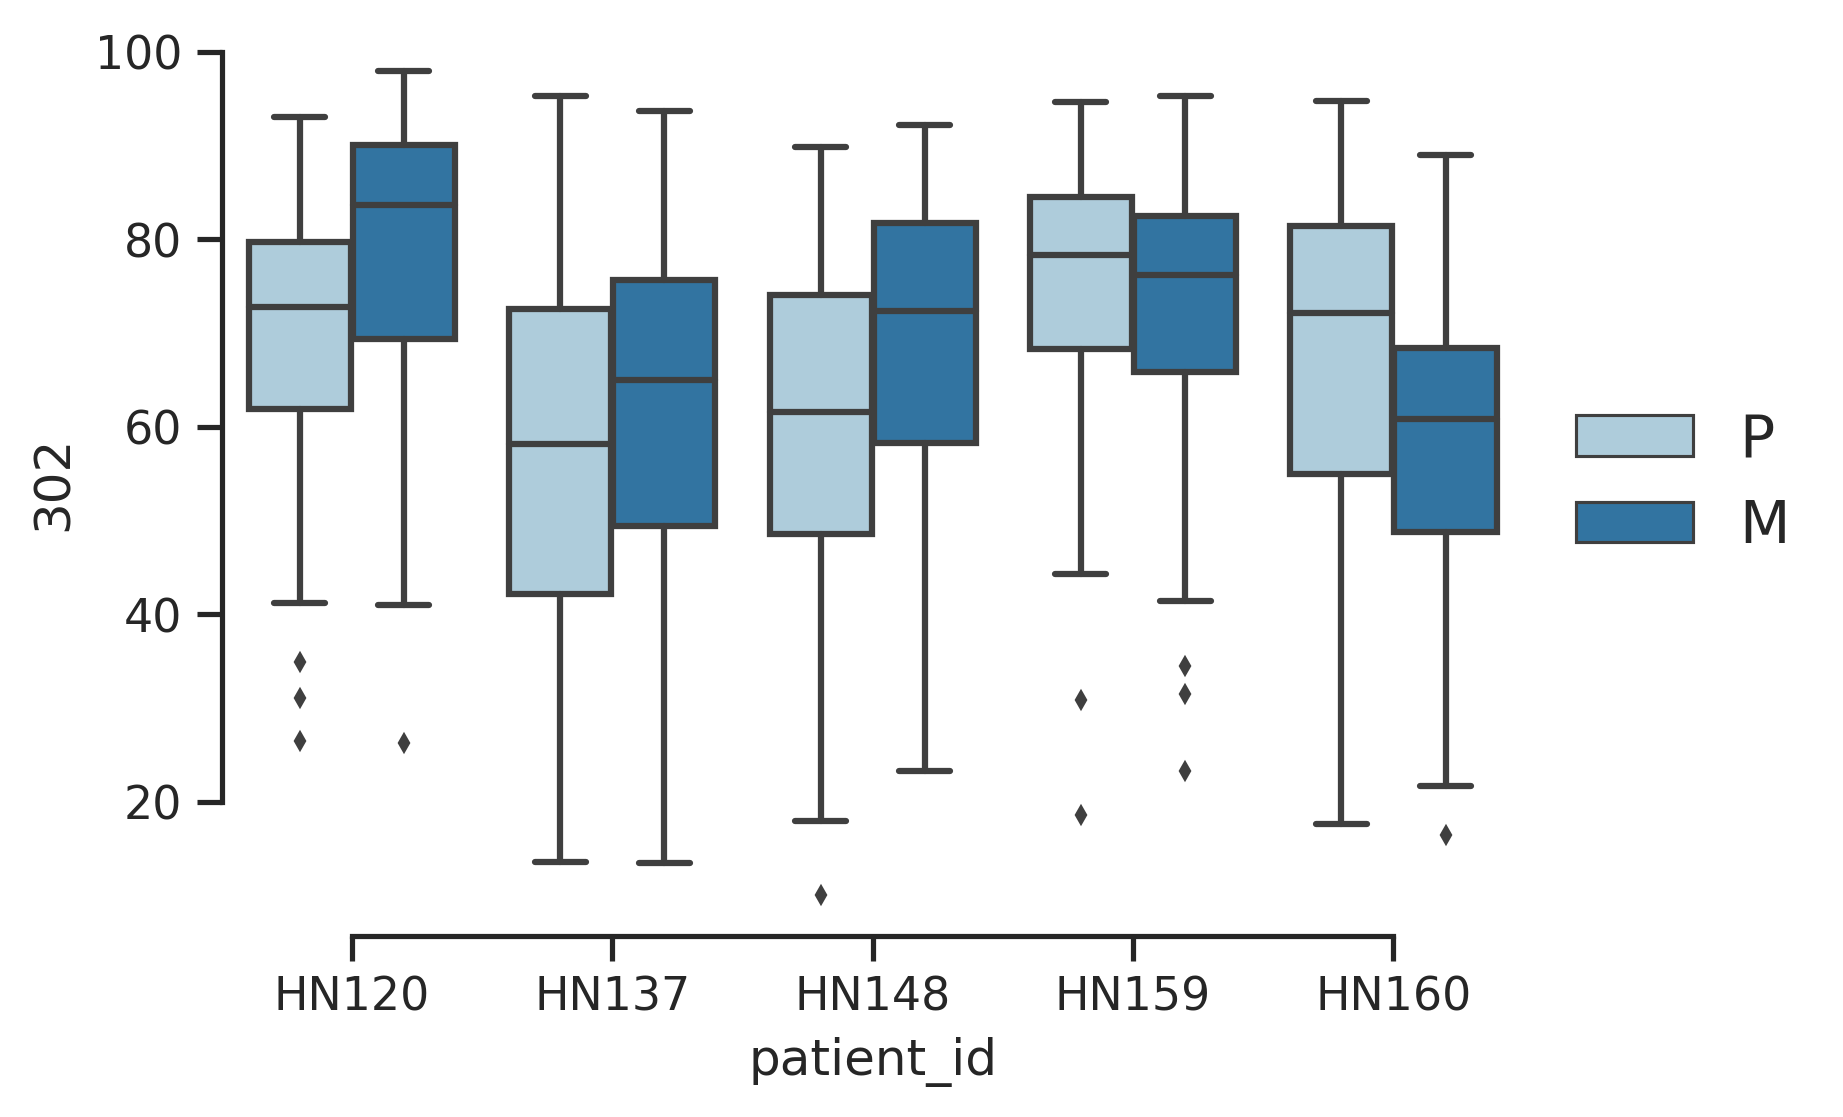

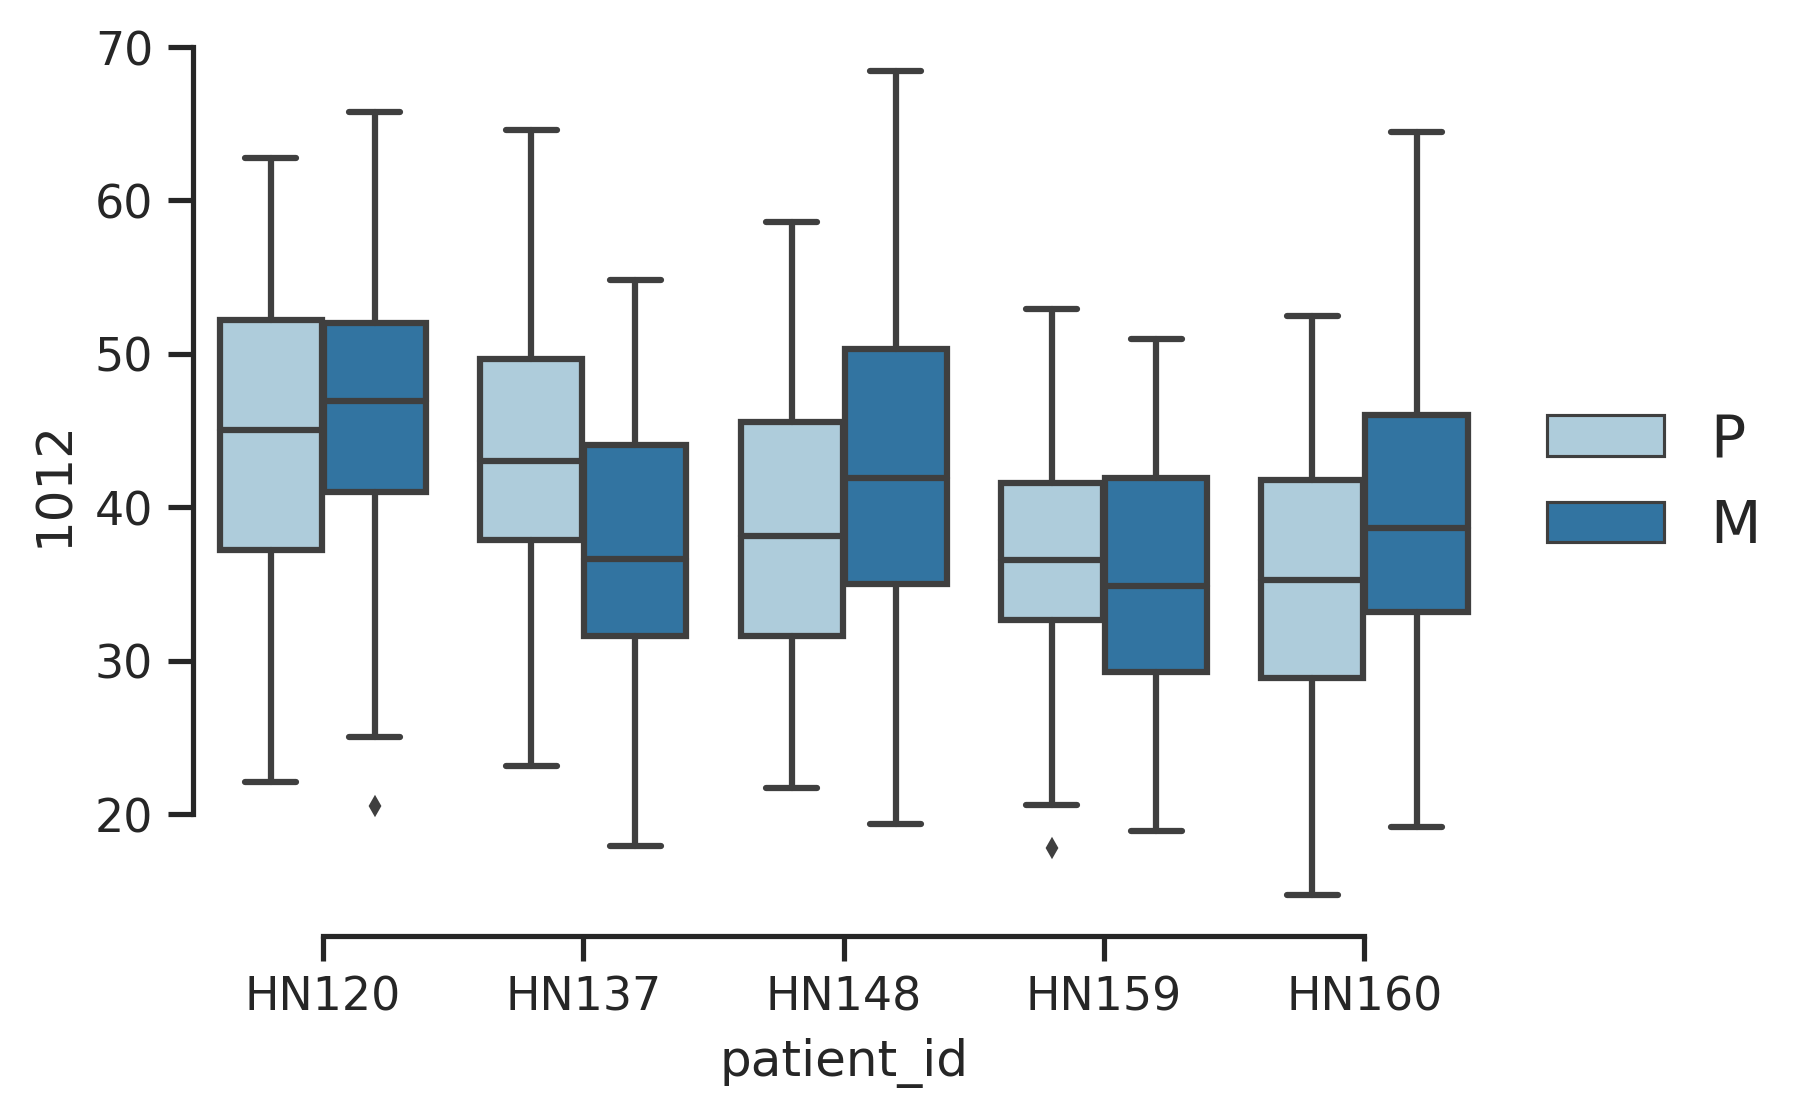

In [308]:
for drug_id, drug_name in zip(single_drug_id_list, single_drug_list):
    sns.set(font_scale=1, style='ticks')
    fig, ax = plt.subplots(figsize=(7,4))

    # sns.swarmplot(data=df, x='patient_id', y='Epothilone B', hue='site', s=3, alpha=0.9, ax=ax)
    sns.boxplot(data=cell_pred_df, x='patient_id', y=str(drug_id), hue='site', fliersize=2.5, palette='Paired', ax=ax)


    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0, markerscale=1., fontsize=14)

    sns.despine(trim=True)

# Pathway analysis

## Calculate pathway activity scores

In [156]:
exp_df = pd.read_csv('../data/GDSC/GDSC_exp.tsv', sep='\t', index_col=0)
exp_df = exp_df.dropna(axis=0).reset_index()
exp_df = exp_df.groupby('GENE').mean()
exp_df.head()

906826  687983  910927  1240138  1240139  906792  910688  1240135  \
GENE                                                                          
A1BG        6.21    5.03    5.51     4.21     3.40    4.92    3.83     5.15   
A1CF        2.98    2.95    2.87     3.08     2.85    3.22    3.00     2.89   
A2M         3.13    3.34    3.29     3.03     3.26    6.88    3.30     3.37   
A2ML1       2.65    2.73    3.95     2.78     2.71    2.91    2.79     2.82   
A3GALT2P    2.76    2.87    3.01     2.63     2.69    2.59    2.92     2.74   

          1290812  907045  ...  753584  907044  998184  908145  1659787  \
GENE                       ...                                            
A1BG         3.11    5.06  ...    4.27    3.44    4.93    2.90     4.52   
A1CF         2.76    2.99  ...    2.94    3.16    2.98    3.12     2.98   
A2M          3.32    3.53  ...    3.89    3.47    3.25    6.34     3.53   
A2ML1        2.73    2.97  ...    2.90    2.79    2.71    2.83     2.76   
A3GALT2P     2.99    3.04  ...    2.96    3.06    2.76    2.60     2.77   

          1298157  1480372  1298533  930299  905954.1  
GENE                                                   
A1BG         5.07     2.96     3.09    4.05      5.33  
A1CF         2.91     2.94     2.78    2.87      2.93  
A2M          3.15     3.20     3.48    5.16      8.85  
A2ML1        2.75     2.91     2.91    2.79      2.98  
A3GALT2P     2.84     2.70     2.66    2.76      2.60  

[5 rows x 1018 columns]

In [157]:
exp_df.shape, exp_df.index.unique().shape

((17419, 1018), (17419,))

In [129]:
f = open('../data/c2.cp.biocarta.v7.1.symbols.gmt', 'r')
content = f.readlines()
f.close()

In [158]:
pathway_dict = {}
for row in content:
    items = row.split('\t')
    pathway_dict[items[0]] = [g for g in items[2:] if g in exp_df.index]

In [159]:
log2_fc_df = np.log2(exp_df.T) - np.log2(exp_df.T).mean()
log2_fc_df.head()

GENE     A1BG  A1CF   A2M  A2ML1  A3GALT2P    A4GALT     A4GNT  AAAS  \
906826   0.58 -0.09 -0.26  -0.14     -0.03  4.55e-03  3.86e-02 -0.07   
687983   0.27 -0.11 -0.17  -0.10      0.02 -8.76e-02 -4.62e-02  0.16   
910927   0.41 -0.15 -0.19   0.43      0.09  7.88e-02 -1.41e-02  0.04   
1240138  0.02 -0.05 -0.31  -0.08     -0.10 -7.38e-02 -6.14e-02 -0.01   
1240139 -0.29 -0.15 -0.21  -0.11     -0.07 -4.12e-02 -9.65e-03  0.11   

GENE         AACS  AACSP1  ...  ZUFSP  ZWILCH     ZWINT  ZXDB  ZXDC  ZYG11A  \
906826  -5.09e-03   -0.11  ...  -0.07   -0.02  1.16e-01  0.02 -0.08    0.17   
687983   3.43e-02   -0.09  ...   0.19    0.18  1.67e-01  0.10  0.04    0.26   
910927  -5.57e-02   -0.19  ...  -0.05   -0.04  4.85e-02  0.06 -0.13   -0.11   
1240138  6.02e-03    0.02  ...   0.03   -0.24 -1.06e-01 -0.03 -0.31   -0.17   
1240139 -1.63e-02   -0.04  ...  -0.02    0.03 -5.11e-03  0.02 -0.20   -0.13   

GENE     ZYG11B       ZYX     ZZEF1      ZZZ3  
906826     0.07 -1.22e-01 -1.23e-01  1.92e-01  
687983     0.28 -2.70e-01  7.90e-02  4.88e-03  
910927    -0.01 -4.33e-03  8.27e-03  9.10e-02  
1240138   -0.15  2.57e-01  1.13e-01 -2.62e-01  
1240139    0.19  1.69e-01  1.51e-01 -1.58e-01  

[5 rows x 17419 columns]

In [184]:
model_dict = pickle.load(open('../result/HN_model/hn_drug_cw_dw10_100000_output_dict.pickle', 'rb'))
pred_train_df = model_dict['pred_train_df'][[str(d) for d in single_drug_id_list]]
pred_train_df.head()

Drug ID   1007   133   201  1010   182   301   302  1012
1299081  -6.70 -3.59 -6.63  1.03 -2.82  3.25  1.04  2.09
713899   -5.84 -3.78 -9.24  1.43 -2.46  1.59 -0.98  2.42
906863  -10.19 -3.30 -6.31 -1.53 -2.90  3.85  4.13  1.00
1290814  -5.88  0.20 -4.11  1.46  0.78  5.19  3.99  0.97
907268   -4.36 -2.78 -5.19  1.91 -1.75 -0.49 -3.49  1.17

In [245]:
drug_info_df = pd.read_csv('../preprocessed_data/GDSC/hn_drug_stat.csv', index_col=0).loc[single_drug_id_list]
drug_info_df.index = drug_info_df.index.astype(str)
ref_type = 'log2_median_ic50_hn'

pred_delta_df = pd.DataFrame(pred_train_df.values - drug_info_df[ref_type].values, columns=single_drug_id_list, index=pred_train_df.index)
pred_cv_df = 100 / (1 + (np.power(2, -pred_delta_df)))
pred_kill_df = 100 - pred_cv_df
pred_kill_df.columns = pred_kill_df.columns.astype(str)
pred_kill_df.head()

1007    133    201   1010    182    301    302   1012
906826    3.70  23.50   7.13   4.69  12.45  51.07  80.13  19.70
687983   10.03   9.46   3.77   7.86   9.11  51.32  81.76  30.45
910927   27.47  75.74  76.44   9.98  61.16  24.94  25.99  34.17
1240138   5.13  28.17  13.69  17.86  20.91  50.57  71.48  50.05
1240139   7.43  59.61  30.12  28.80  53.56  35.75  51.96  64.99

In [185]:
cl_list = list((log2_fc_df.index).intersection(pred_train_df.index))
len(cl_list)

log2_fc_df = log2_fc_df.loc[cl_list]
pred_train_df = pred_train_df.loc[cl_list]

In [186]:
results = []
pathway_score_df = pd.DataFrame(index=log2_fc_df.index)

for pathway_name, gene_list in pathway_dict.items():
    pathway_score = log2_fc_df[gene_list].sum(axis=1)
    pathway_score_df.loc[:, pathway_name] = pathway_score

pathway_score_df.head()

BIOCARTA_RELA_PATHWAY  BIOCARTA_NO1_PATHWAY  BIOCARTA_CSK_PATHWAY  \
906826                   -0.17                 -0.65                 -2.85   
687983                    0.30                 -0.91                 -0.47   
910927                   -0.19                  0.13                 -3.12   
1240138                   0.38                 -0.96                 -2.72   
1240139                  -0.05                  0.25                 -2.02   

         BIOCARTA_SRCRPTP_PATHWAY  BIOCARTA_AMI_PATHWAY  \
906826                       0.34                  1.90   
687983                       0.22                 -2.30   
910927                      -0.24                  3.13   
1240138                     -1.03                  3.59   
1240139                      0.32                  4.02   

         BIOCARTA_GRANULOCYTES_PATHWAY  BIOCARTA_LYM_PATHWAY  \
906826                           -2.65                 -1.28   
687983                           -2.70                 -2.43   
910927                            0.15                 -0.81   
1240138                           1.60                  0.84   
1240139                          -0.46                 -0.86   

         BIOCARTA_ARAP_PATHWAY  BIOCARTA_AGR_PATHWAY  BIOCARTA_AKAP95_PATHWAY  \
906826                    0.25                  1.32                     0.40   
687983                    0.15                 -1.84                     1.28   
910927                   -0.02                 -1.61                    -0.37   
1240138                   1.56                  2.52                    -1.05   
1240139                   1.15                 -0.65                     0.78   

         ...  BIOCARTA_NOTCH_PATHWAY  BIOCARTA_TUBBY_PATHWAY  \
906826   ...                   -0.83               -2.59e-01   
687983   ...                   -0.02                9.58e-03   
910927   ...                   -0.29                3.13e-01   
1240138  ...                   -0.31                3.62e-01   
1240139  ...                    0.05                3.01e-01   

         BIOCARTA_MRP_PATHWAY  BIOCARTA_DICER_PATHWAY  BIOCARTA_PLCD_PATHWAY  \
906826                  -0.77                   -0.06                  -0.16   
687983                  -0.76                   -0.13                  -0.43   
910927                   0.21                    0.17                  -0.98   
1240138                 -0.21                   -0.09                  -0.69   
1240139                  0.47                   -0.08                  -0.14   

         BIOCARTA_RAN_PATHWAY  BIOCARTA_WNT_LRP6_PATHWAY  \
906826                  -0.07                       0.55   
687983                  -0.17                       0.87   
910927                  -0.02                      -1.22   
1240138                 -0.08                       0.70   
1240139                 -0.15                       0.26   

         BIOCARTA_PEPI_PATHWAY  BIOCARTA_IFNG_PATHWAY  \
906826                   -0.50                  -0.53   
687983                   -1.18                  -0.39   
910927                   -0.26                  -0.92   
1240138                   1.04                   0.31   
1240139                  -1.11                  -0.36   

         BIOCARTA_BOTULIN_PATHWAY  
906826                      -0.51  
687983                      -0.29  
910927                      -0.58  
1240138                     -0.16  
1240139                     -0.45  

[5 rows x 289 columns]

In [282]:
results = []

for pathway_name in pathway_score_df.columns:
    x = pathway_score_df[pathway_name]
    for drug_id in pred_kill_df.columns:
        y = pred_kill_df[drug_id]
        pcor, pcor_pval = stats.pearsonr(x, y)
        scor, scor_pval = stats.spearmanr(x, y)
        results += [[pathway_name, drug_id, pcor, pcor_pval, scor, scor_pval]]
        
pathway_drug_cor_df = pd.DataFrame(results, columns=['pathway', 'drug_id', 'pearson', 'pearson_pval', 'spearman', 'spearman_pval'])
pathway_drug_cor_df.head()

pathway drug_id  pearson  pearson_pval  spearman  \
0  BIOCARTA_RELA_PATHWAY    1007     0.18      1.84e-08      0.13   
1  BIOCARTA_RELA_PATHWAY     133     0.22      7.84e-12      0.21   
2  BIOCARTA_RELA_PATHWAY     201     0.09      4.85e-03      0.10   
3  BIOCARTA_RELA_PATHWAY    1010     0.21      1.11e-11      0.19   
4  BIOCARTA_RELA_PATHWAY     182     0.21      5.94e-11      0.20   

   spearman_pval  
0       2.92e-05  
1       4.65e-11  
2       2.45e-03  
3       2.38e-09  
4       2.26e-10

In [316]:
from statsmodels.stats.multitest import multipletests

In [317]:
is_pass, cpval, alphac_sidak, alphac_bonf = multipletests(pathway_drug_cor_df['pearson_pval'], alpha=0.05, method='fdr_bh')
pathway_drug_cor_df.loc[:, 'corrected_pearson_pval'] = cpval

is_pass, cpval, alphac_sidak, alphac_bonf = multipletests(pathway_drug_cor_df['spearman_pval'], alpha=0.05, method='fdr_bh')
pathway_drug_cor_df.loc[:, 'corrected_spearman_pval'] = cpval

In [327]:
ranksum = []

for _, row in pathway_drug_cor_df.iterrows():

    x = pathway_score_df[row['pathway']]
    y = pred_kill_df[row['drug_id']]
    y1 = y[x>0].values
    y2 = y[x<=0].values
    r, p = stats.ranksums(y1, y2)
    
    ranksum += [p]

In [331]:
is_pass, cpval, alphac_sidak, alphac_bonf = multipletests(ranksum, alpha=0.05, method='fdr_bh')

pathway_drug_cor_df.loc[:, 'corrected_ranksum'] = cpval
pathway_drug_cor_df.head()

pathway drug_id  pearson  pearson_pval  spearman  \
0  BIOCARTA_RELA_PATHWAY    1007     0.18      1.84e-08      0.13   
1  BIOCARTA_RELA_PATHWAY     133     0.22      7.84e-12      0.21   
2  BIOCARTA_RELA_PATHWAY     201     0.09      4.85e-03      0.10   
3  BIOCARTA_RELA_PATHWAY    1010     0.21      1.11e-11      0.19   
4  BIOCARTA_RELA_PATHWAY     182     0.21      5.94e-11      0.20   

   spearman_pval  corrected_pearson_pval  corrected_spearman_pval  \
0       2.92e-05                4.95e-08                 5.99e-05   
1       4.65e-11                2.79e-11                 1.62e-10   
2       2.45e-03                7.47e-03                 4.06e-03   
3       2.38e-09                3.89e-11                 7.14e-09   
4       2.26e-10                1.97e-10                 7.36e-10   

   corrected_ranksum  
0           8.05e-04  
1           5.11e-07  
2           4.98e-03  
3           3.44e-06  
4           5.50e-06

## Plot for a specific drug

In [356]:
drug_id = '201'

In [357]:
pathway_drug_cor_df[pathway_drug_cor_df['drug_id']==drug_id].sort_values('pearson')

pathway drug_id  pearson  pearson_pval  spearman  \
1170            BIOCARTA_BAD_PATHWAY     201    -0.22      1.63e-12     -0.20   
1178            BIOCARTA_CK1_PATHWAY     201    -0.20      1.66e-10     -0.19   
1690           BIOCARTA_PDZS_PATHWAY     201    -0.20      2.85e-10     -0.21   
1610           BIOCARTA_CREB_PATHWAY     201    -0.19      3.67e-09     -0.16   
1354      BIOCARTA_BARR_MAPK_PATHWAY     201    -0.17      8.33e-08     -0.14   
...                              ...     ...      ...           ...       ...   
1874  BIOCARTA_ACETAMINOPHEN_PATHWAY     201     0.15      1.78e-06      0.14   
682             BIOCARTA_HIF_PATHWAY     201     0.16      2.51e-07      0.14   
434             BIOCARTA_RNA_PATHWAY     201     0.18      2.29e-08      0.18   
1242         BIOCARTA_LEPTIN_PATHWAY     201     0.18      5.21e-09      0.16   
1674            BIOCARTA_WNT_PATHWAY     201     0.22      3.44e-12      0.21   

      spearman_pval  corrected_pearson_pval  corrected_spearman_pval  \
1170       2.05e-10                6.06e-12                 6.74e-10   
1178       2.87e-09                5.38e-10                 8.51e-09   
1690       8.05e-11                9.02e-10                 2.73e-10   
1610       2.22e-07                1.06e-08                 5.61e-07   
1354       1.48e-05                2.12e-07                 3.15e-05   
...             ...                     ...                      ...   
1874       5.87e-06                4.04e-06                 1.29e-05   
682        5.06e-06                6.18e-07                 1.13e-05   
434        7.75e-09                6.11e-08                 2.22e-08   
1242       3.38e-07                1.48e-08                 8.36e-07   
1674       2.43e-11                1.25e-11                 8.66e-11   

      corrected_ranksum  
1170           2.94e-07  
1178           1.33e-07  
1690           1.86e-07  
1610           1.86e-04  
1354           3.08e-04  
...                 ...  
1874           1.63e-02  
682            1.26e-04  
434            6.76e-08  
1242           1.69e-06  
1674           7.24e-08  

[289 rows x 9 columns]

In [351]:
# y1 = y[x>0].values
# y2 = y[x<=0].values
# r, p = stats.ranksums(y1, y2)

(0.21928953701417894, 3.439986650877334e-12)


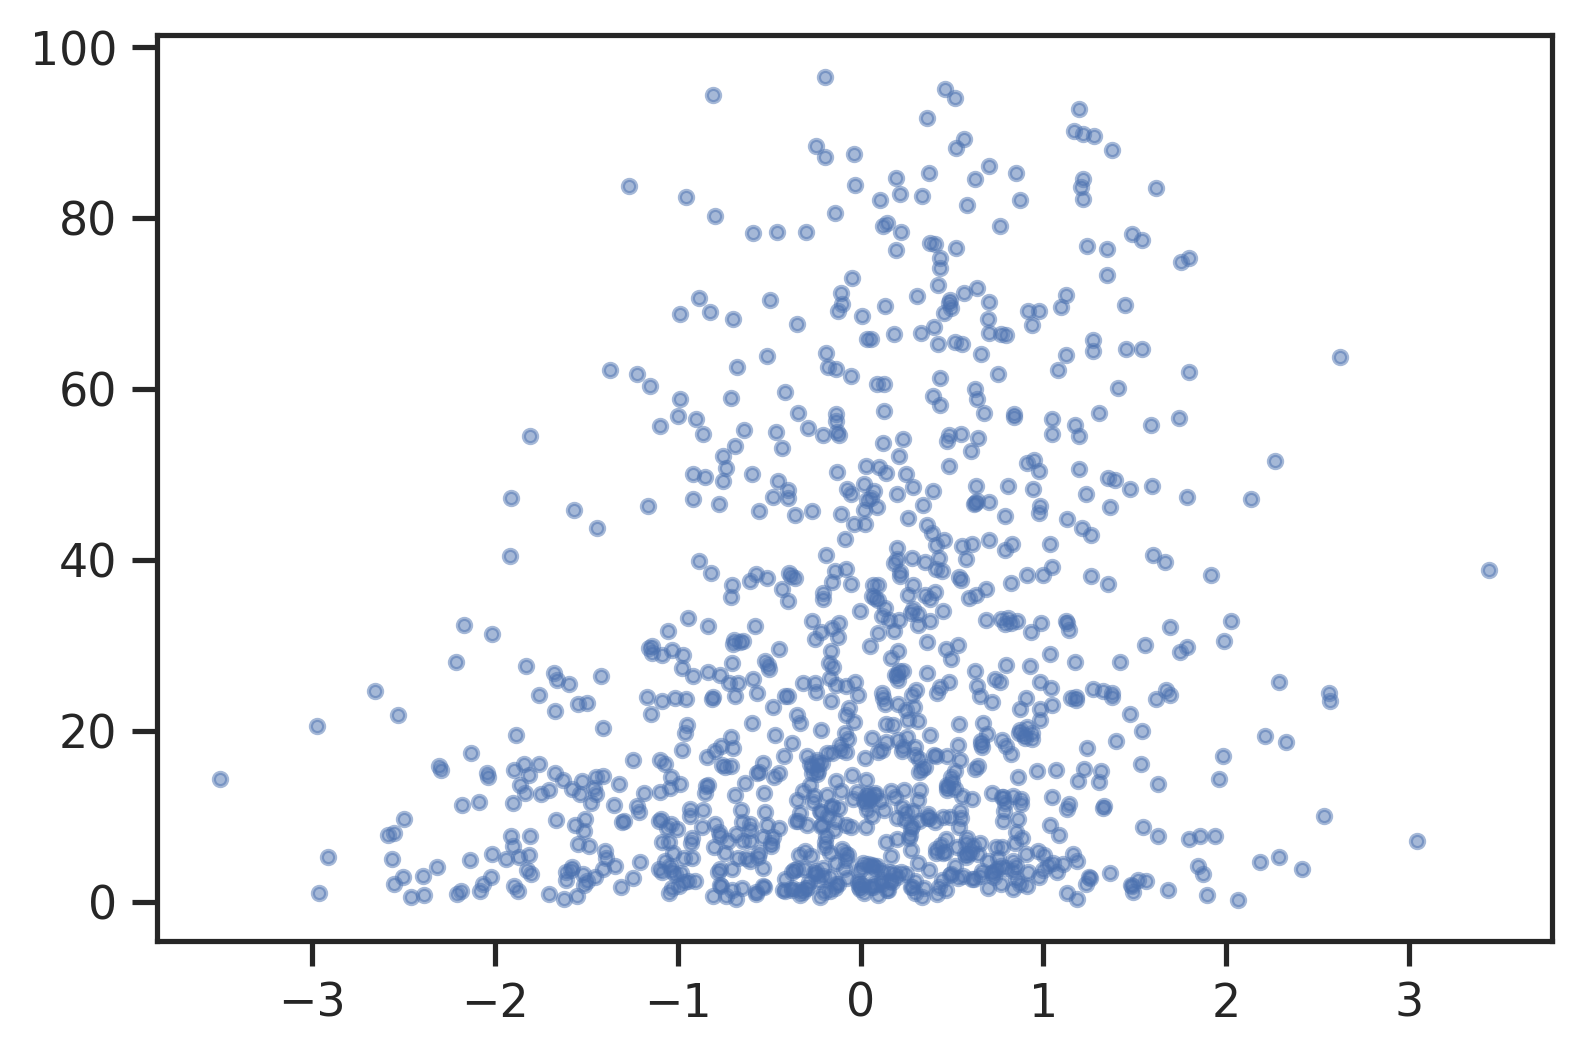

In [358]:
x = pathway_score_df['BIOCARTA_WNT_PATHWAY']
y = pred_kill_df[drug_id]
print (stats.pearsonr(x, y))
plt.scatter(x, y, s=10, alpha=0.5)

In [359]:
df = pd.DataFrame([x, y, (x>0)]).T
df.columns = ['pathway', 'drug', 'pathway_activate']
df

pathway   drug  pathway_activate
906826     -0.61   7.13               0.0
687983      2.41   3.77               1.0
910927      0.52  76.44               1.0
1240138     0.47  13.69               1.0
1240139    -0.70  30.12               0.0
...          ...    ...               ...
908145     -0.30   5.93               0.0
1298157     0.58   5.16               1.0
1480372     0.84   3.61               1.0
1298533    -0.09   3.81               0.0
930299     -0.70   1.33               0.0

[985 rows x 3 columns]

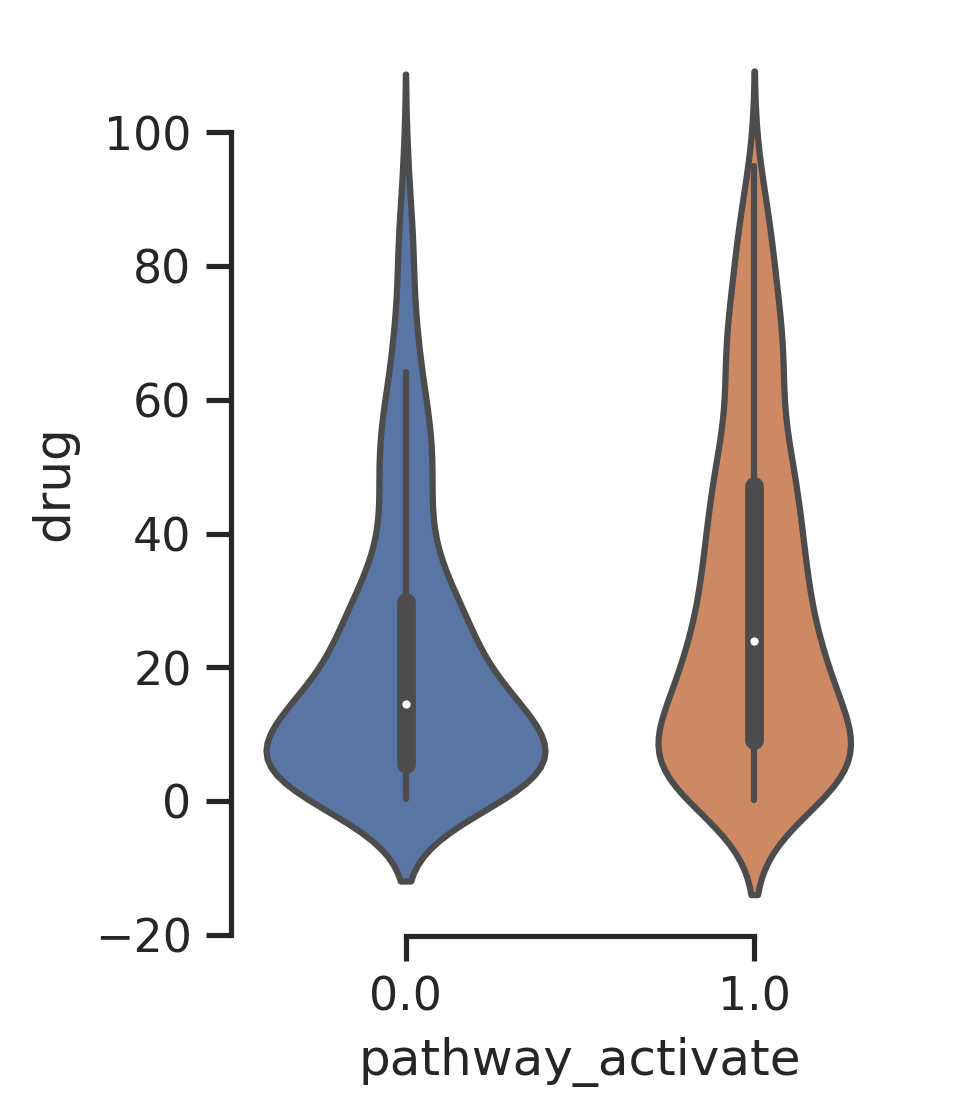

In [360]:
fig, ax = plt.subplots(figsize=(3,4))
sns.violinplot(data=df, x='pathway_activate', y='drug', inner='box', ax=ax)
sns.despine(trim=True)
plt.savefig('../figure/Fig4_sup_{}.svg'.format(drug_id))

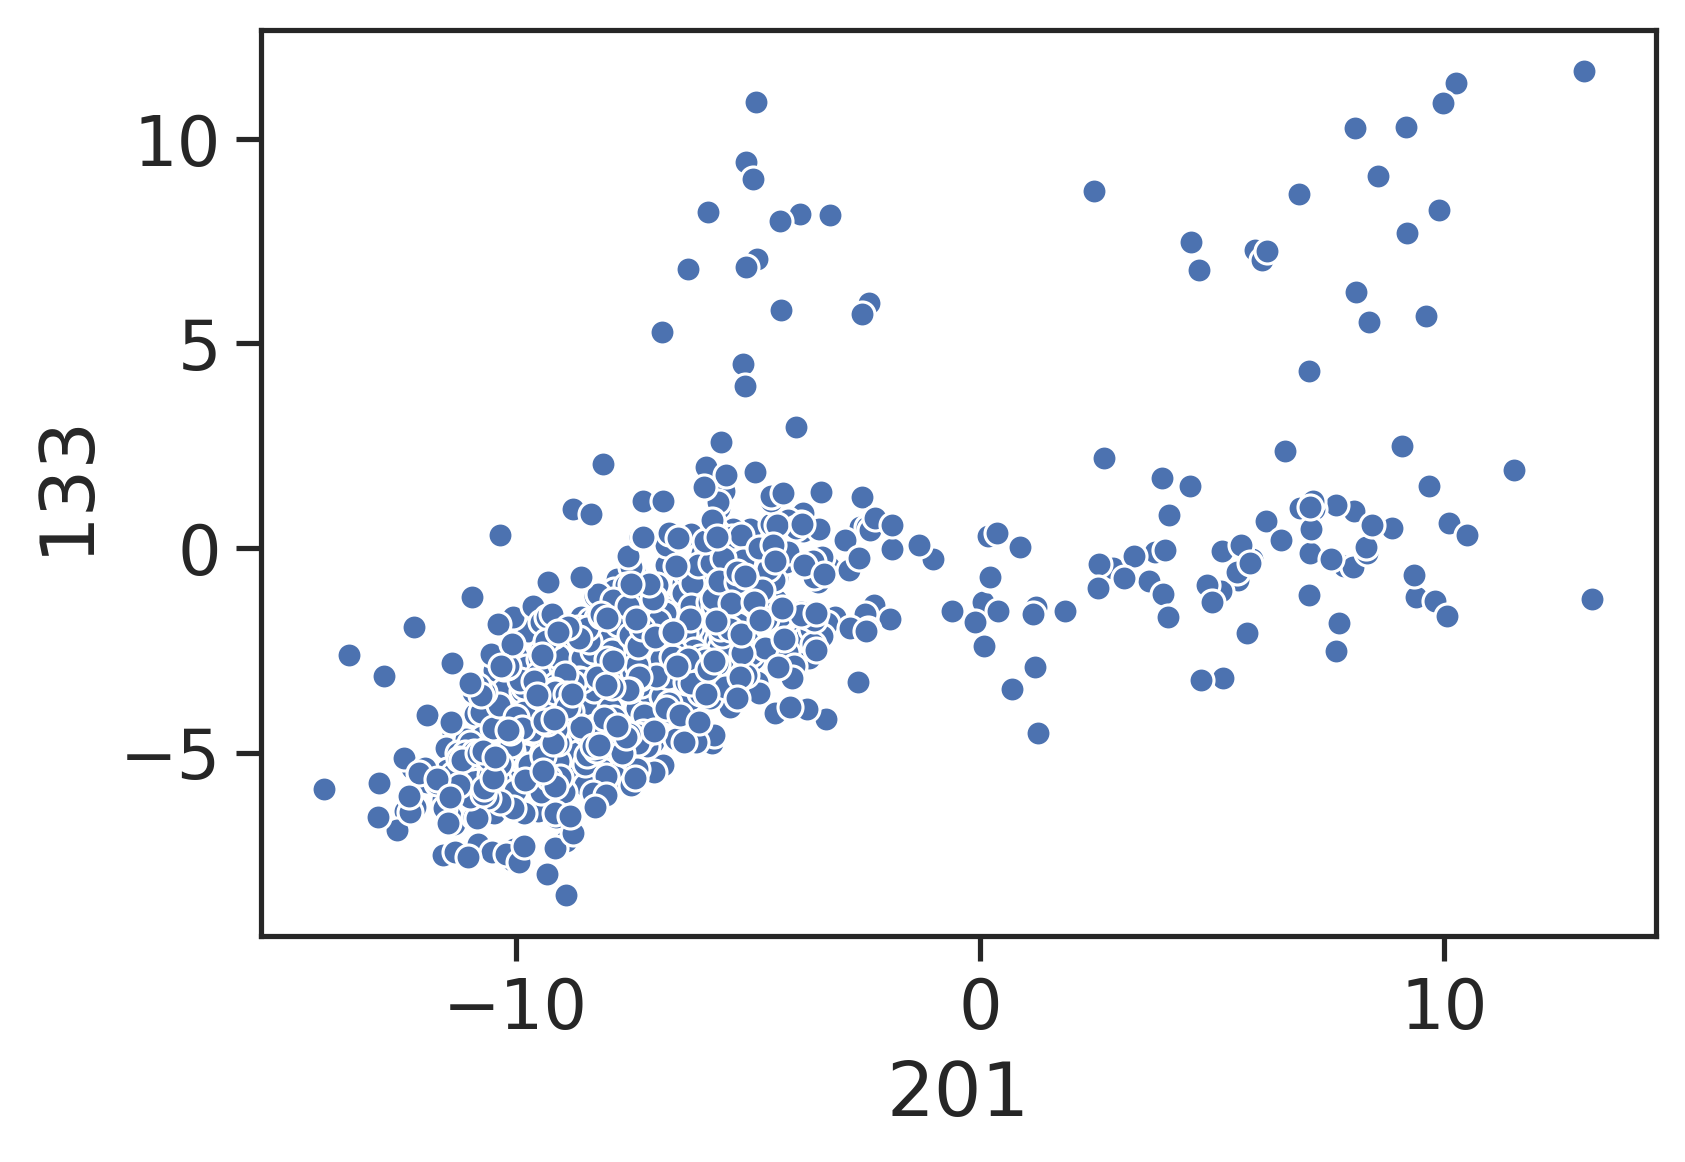

In [294]:
sns.scatterplot(data=model_dict['obs_train_df'], x='201', y='133')

In [270]:
model_dict.keys()

dict_keys(['pred_test_df', 'obs_test_df', 'pred_train_df', 'obs_train_df', 'b_Q_df', 'P_df', 'Q_df'])